In [168]:
import pandas as pd  
from random import random
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential  
from keras.layers.core import Dense, Activation  
from keras.layers.recurrent import LSTM
import matplotlib.pyplot as plt
import seaborn as sns
import os

import cv2

In [139]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [140]:
path = '/content/drive/MyDrive/HISPC /DATA/TRY/'
# path = 'TRY/'

In [141]:
all_files = os.listdir(path)


In [142]:
X_ds  = np.zeros([1,5])
Y_ds  = np.zeros([30000,1])

In [143]:
# all_files = all_files[:10]

In [144]:
len(all_files)

341

In [145]:
title = []

In [146]:
for fle  in all_files:
    title.append(fle)
    df = pd.read_csv(path + fle, sep = ',')
    df = df.rename(columns = {'Column1':'Time', 'Column2':'Vm','ICaL':'ICaL','IK1':'IK1','Ikr':'Ikr','IKur':'IKur','INa':'INa'})
    df['Time'] = df['Time']-45000
    df = df.dropna()
    #df = df[df.index % 3 != 0]
    y_ds = df[['Vm']].iloc[25000:55000]
    y_ds = y_ds.to_numpy()
    x_ds = df[['ICaL','IK1','IKr','IKur','INa']].to_numpy()[1]
    x_ds = x_ds.reshape((1,5))
    X_ds = np.append(x_ds,X_ds,axis = 0)
    Y_ds = np.append(y_ds,Y_ds,axis = 0)

  

In [148]:
print(X_ds.shape)
print(Y_ds.shape)

(342, 5)
(10260000, 1)


In [149]:
X_ds = X_ds.reshape((342,1,5))
Y_ds = Y_ds.reshape((342,30000,1))
print(X_ds.shape)
print(Y_ds.shape)

(342, 1, 5)
(342, 30000, 1)


In [150]:
X_ds = X_ds[:-1]
Y_ds = Y_ds[:-1]
print(X_ds.shape)
print(Y_ds.shape)

(341, 1, 5)
(341, 30000, 1)


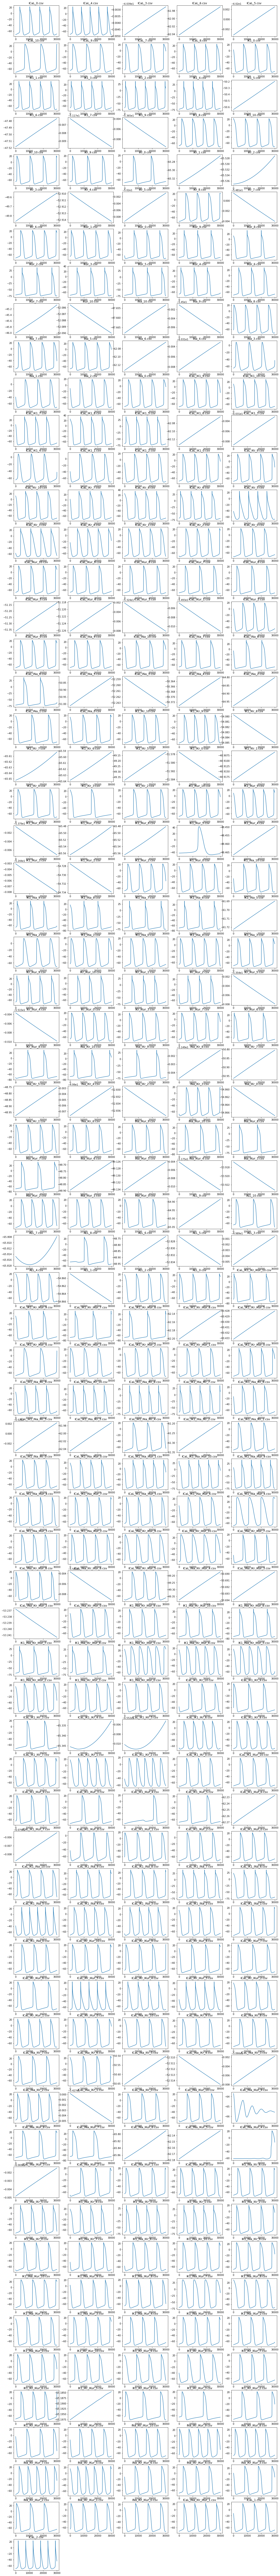

In [177]:
fig = plt.figure(figsize = (20,200))
#  Categorical Data
a = 69  # number of rows
b = 5  # number of columns
c = 1  # initialize plot counter
for i in range(341):
    plt.subplot(a,b,c)
    plt.plot(Y_ds[i])
    plt.title(title[i])
    c = c + 1
    
plt.show()
    

In [ ]:
 X_train, X_test, y_train, y_test = train_test_split(X_ds, Y_ds, test_size=0.2)

In [ ]:
in_neurons = 5
out_neurons = 10000
hidden_neurons = 20000

In [ ]:
model = Sequential()  

model.add(LSTM(hidden_neurons, input_dim=in_neurons, return_sequences=True)) 

model.add(Dense(15000, input_dim=hidden_neurons))
model.add(Dense(out_neurons, input_dim=15000))

model.add(Activation("linear"))  

model.compile(loss='mean_squared_error', optimizer="rmsprop")

In [ ]:
print(model.summary())   

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_5 (LSTM)                (None, None, 300)         367200    
_________________________________________________________________
dense_10 (Dense)             (None, None, 200)         60200     
_________________________________________________________________
dense_11 (Dense)             (None, None, 100)         20100     
_________________________________________________________________
activation_5 (Activation)    (None, None, 100)         0         
Total params: 447,500
Trainable params: 447,500
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
model.fit(X_train, y_train, batch_size=16, epochs=20, validation_split=0.10)  

Epoch 1/20
 71/122 [================>.............] - ETA: 20:21 - loss: 1068.2739

In [ ]:
# model.save('try_1.h5')

In [ ]:

# #plot the training and validation accuracy and loss at each epoch
# loss = history.history['loss']
# val_loss = history.history['val_loss']
# epochs = range(1, len(loss) + 1)
# plt.plot(epochs, loss, 'y', label='Training loss')
# plt.plot(epochs, val_loss, 'r', label='Validation loss')
# plt.title('Training and validation loss')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.legend()
# plt.show()

# acc = history.history['acc']
# val_acc = history.history['val_acc']
# plt.plot(epochs, acc, 'y', label='Training acc')
# plt.plot(epochs, val_acc, 'r', label='Validation acc')
# plt.title('Training and validation accuracy')
# plt.xlabel('Epochs')
# plt.ylabel('Accuracy')
# plt.legend()
# plt.show()

In [ ]:
predicted = model.predict(X_test)  



In [ ]:
rmse = np.sqrt(((predicted - y_test) ** 2).mean(axis=1))
rmse

In [ ]:
predicted.shape

(69, 1, 1)

In [ ]:
plt.plot(predicted[-2].T)

In [ ]:
for i in range(69):
    plt.plot(predicted[i].T)
    plt.show()

In [ ]:
final = pd.DataFrame(predicted,y_test)

ValueError: ignored

In [ ]:
final

In [ ]:
pd.DataFrame(predicted.reshape(45,10001)).to_csv("predicted.csv")  

In [ ]:
# save Model
model_json = model.to_json()
with open('model.json', 'W',) as json_file:
    json_file.write(model_json)
model.save_weights('model.h5')

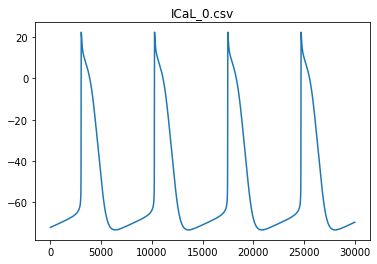

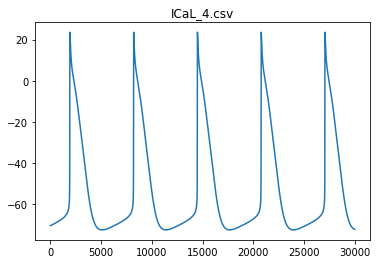

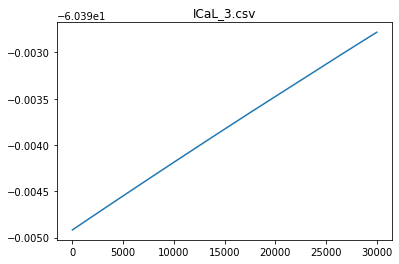

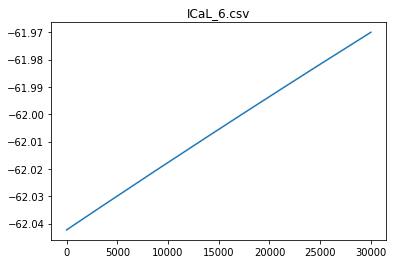

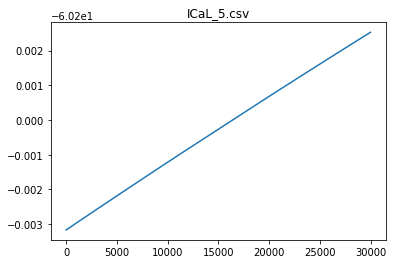

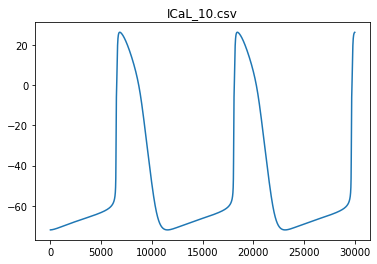

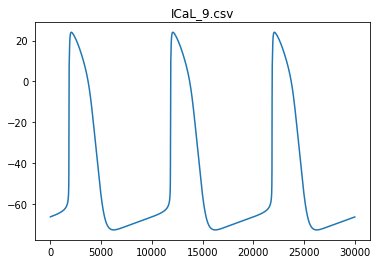

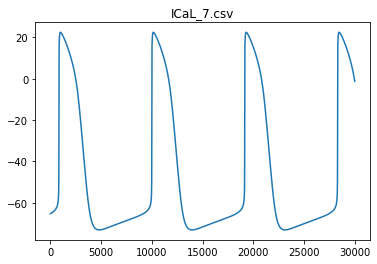

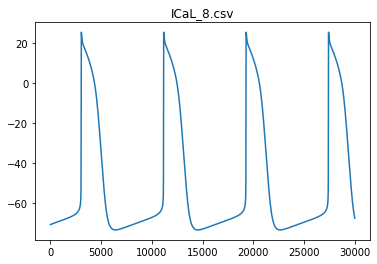

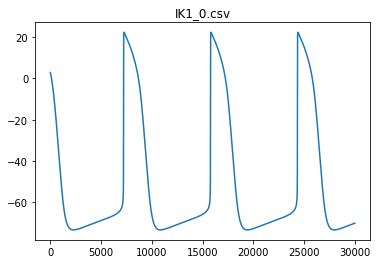

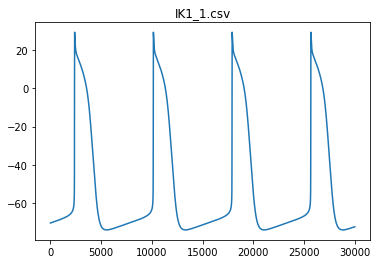

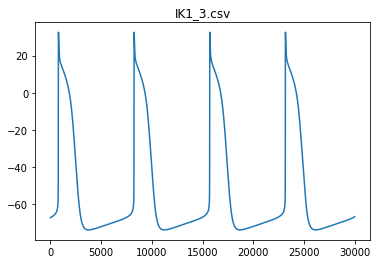

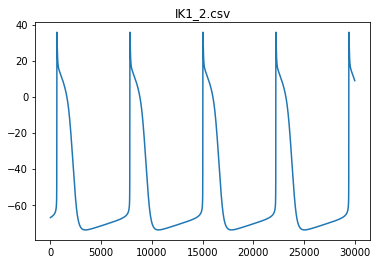

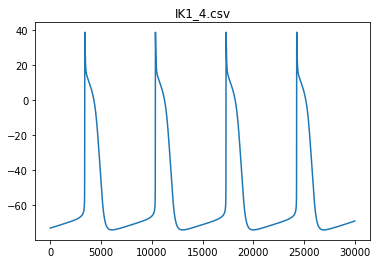

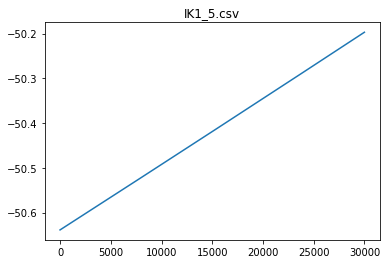

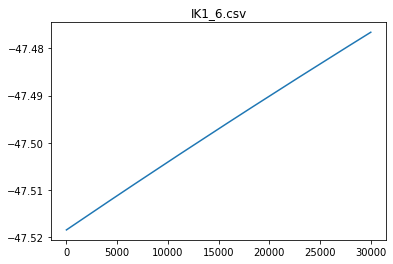

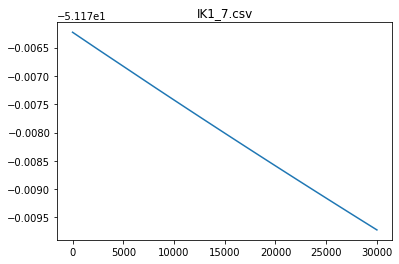

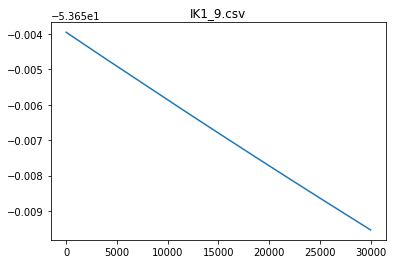

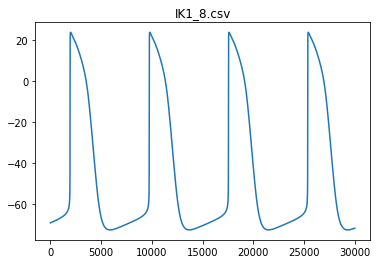

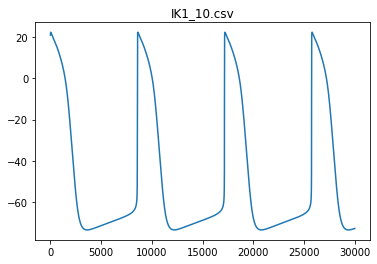

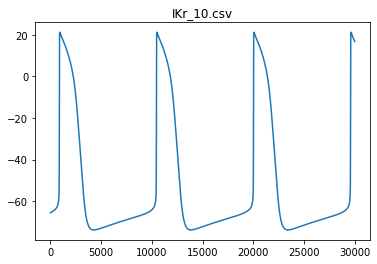

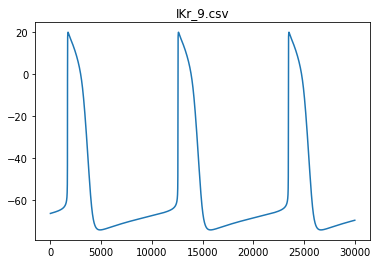

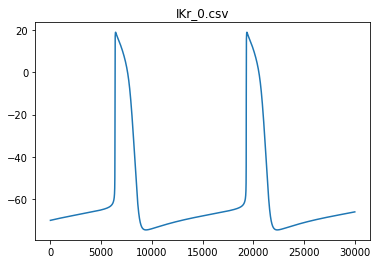

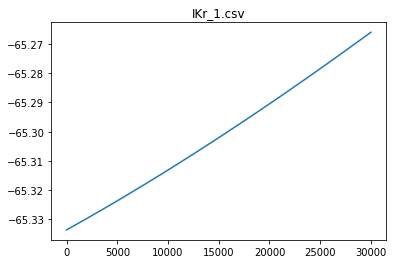

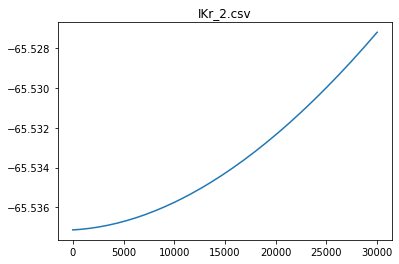

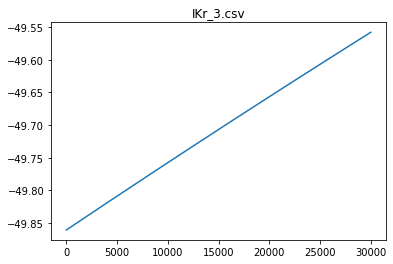

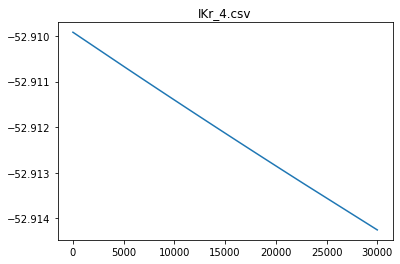

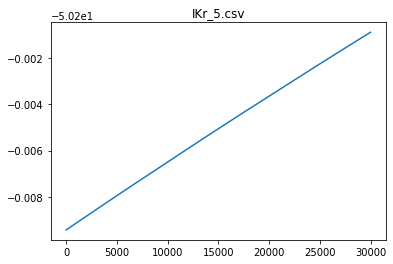

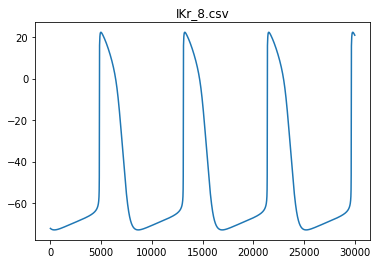

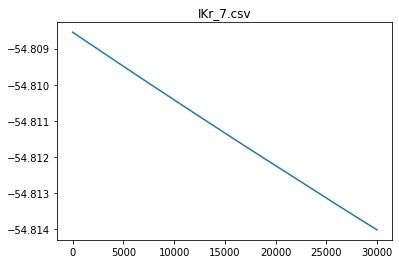

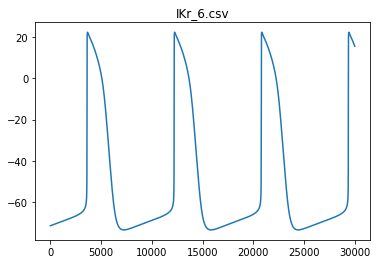

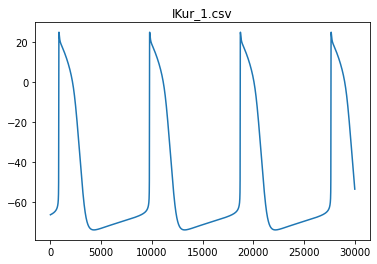

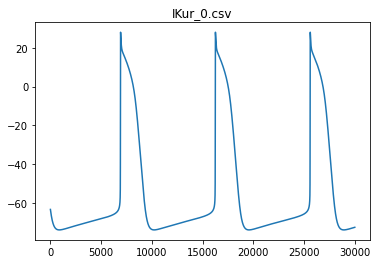

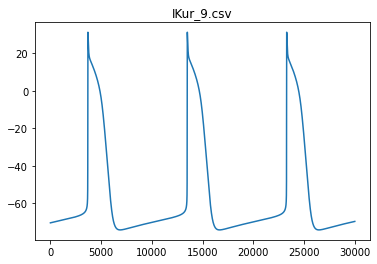

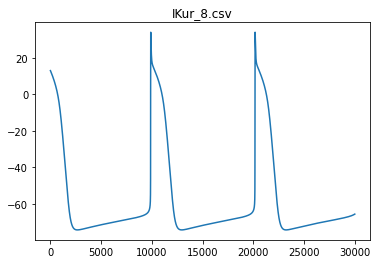

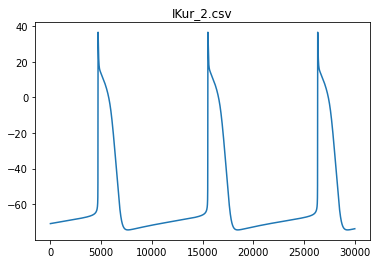

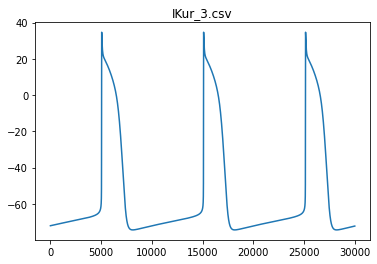

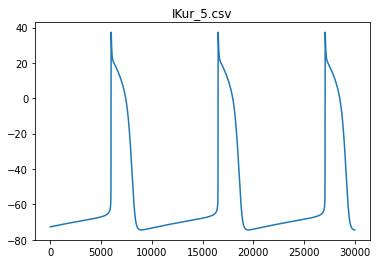

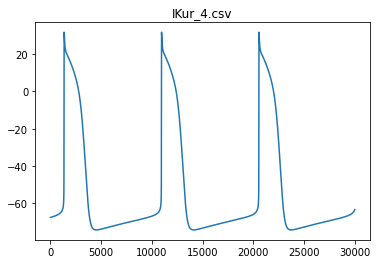

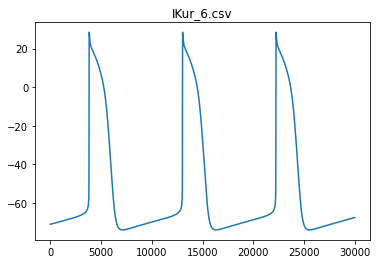

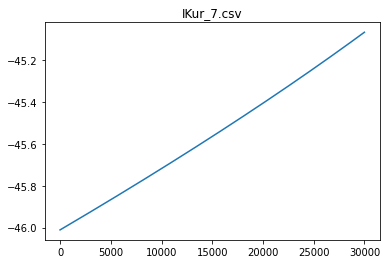

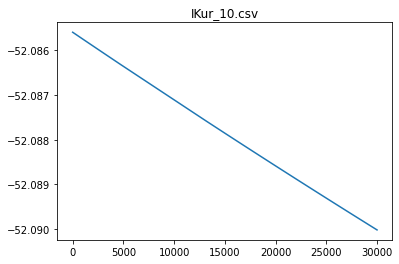

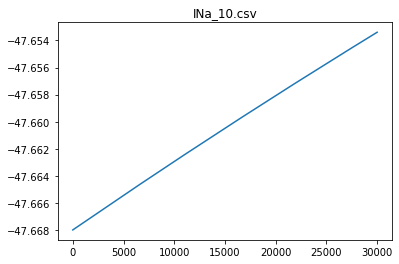

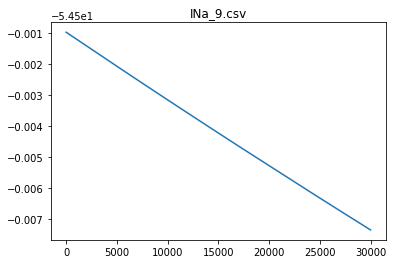

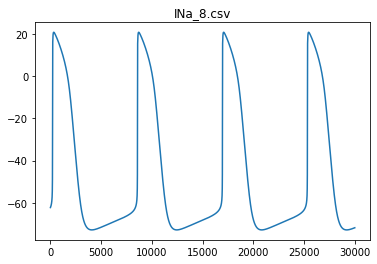

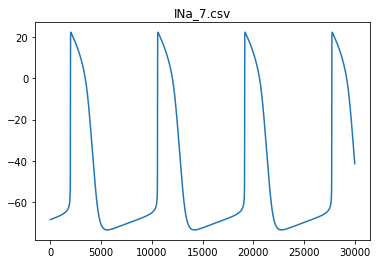

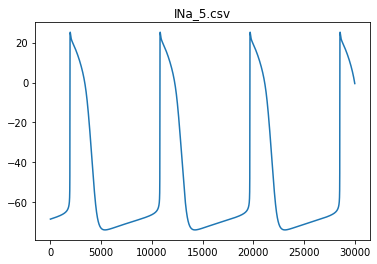

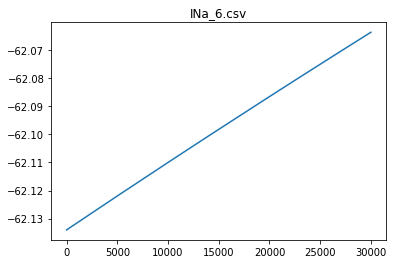

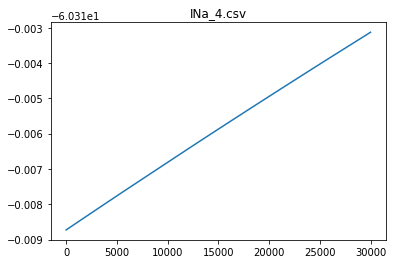

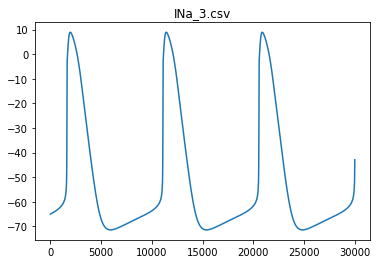

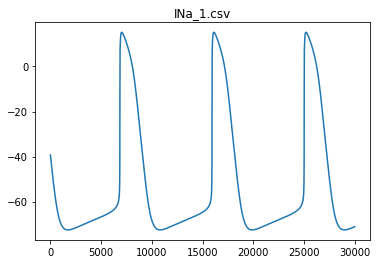

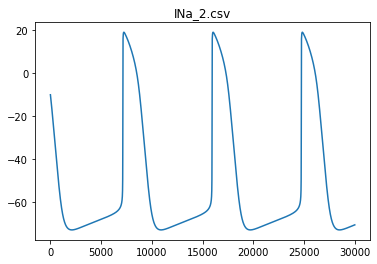

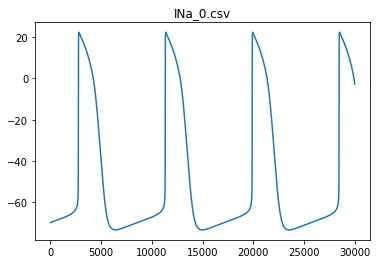

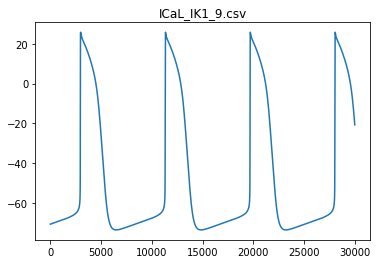

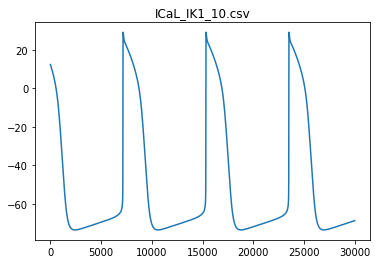

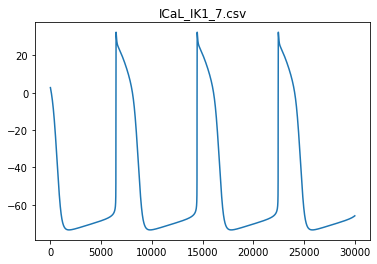

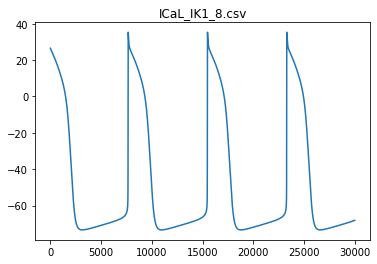

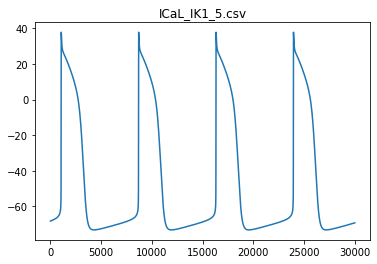

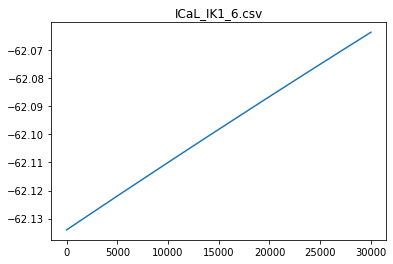

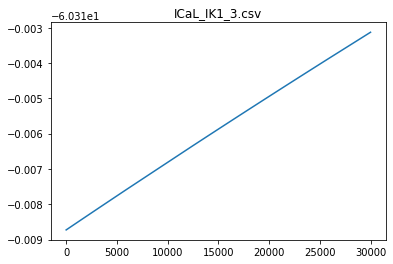

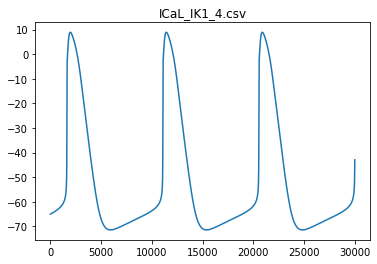

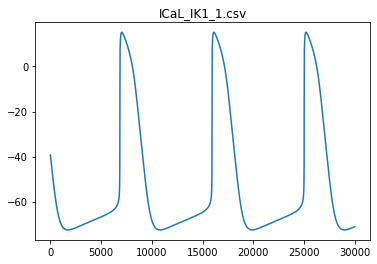

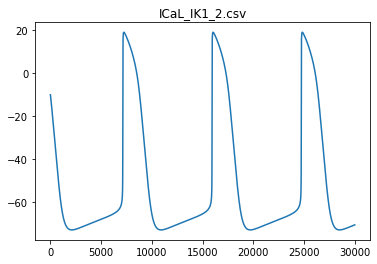

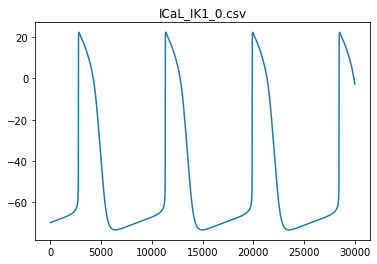

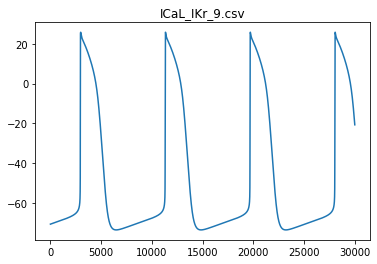

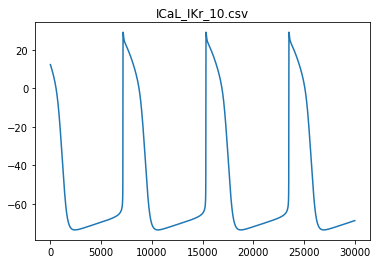

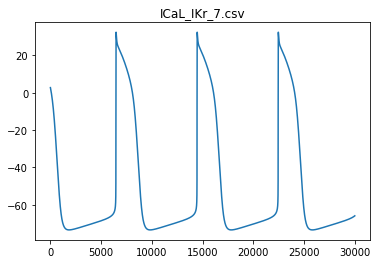

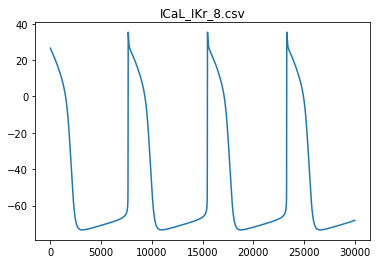

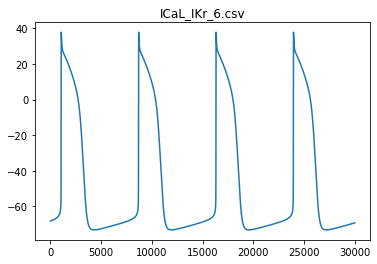

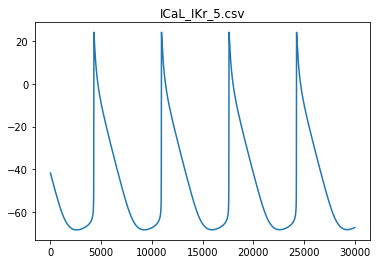

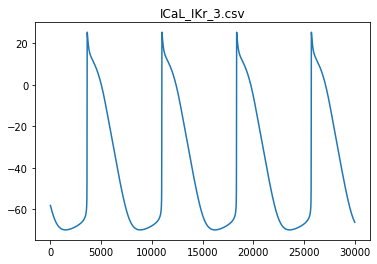

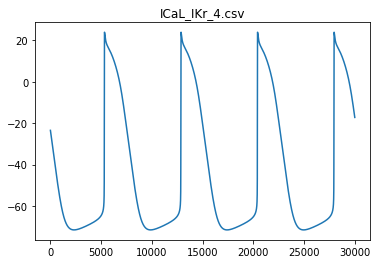

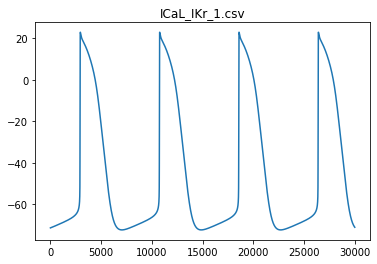

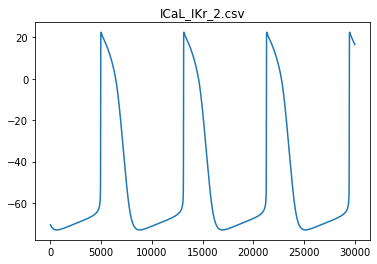

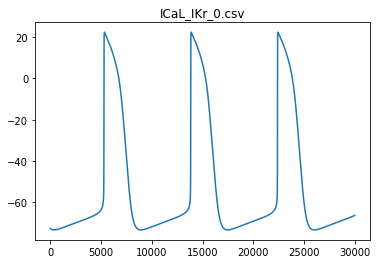

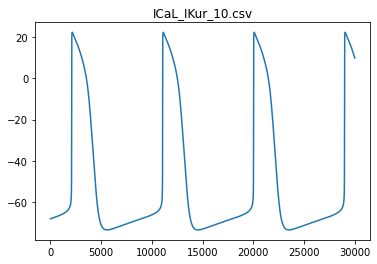

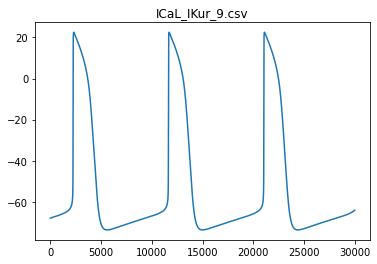

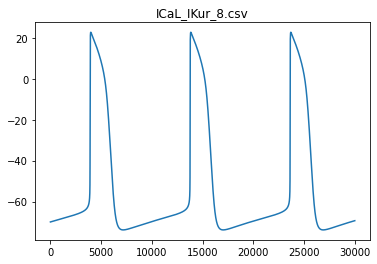

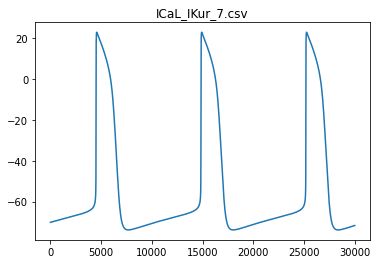

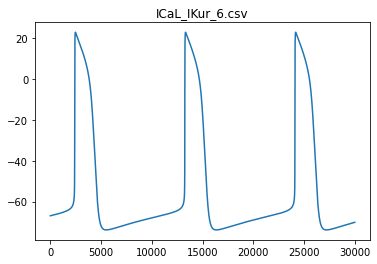

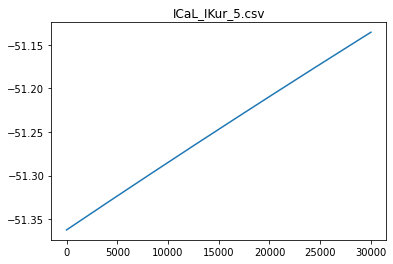

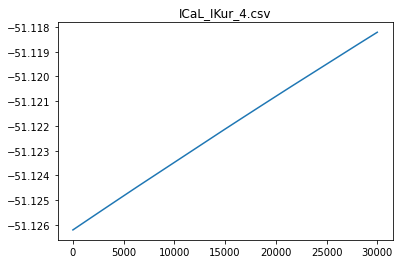

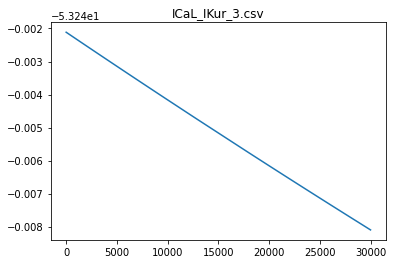

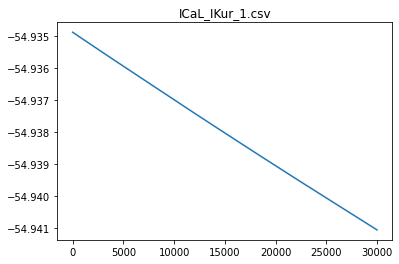

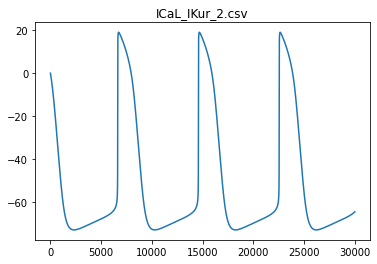

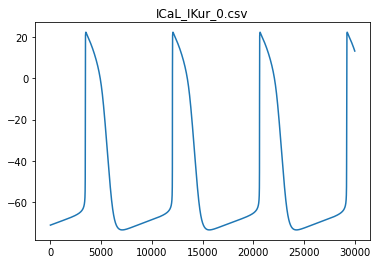

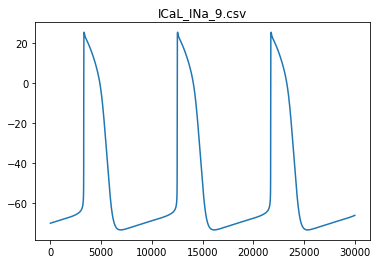

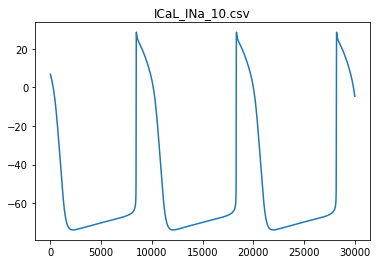

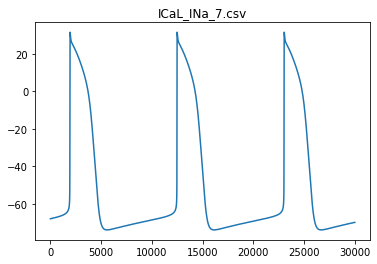

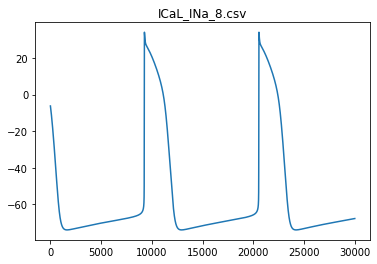

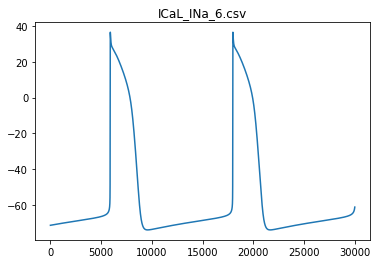

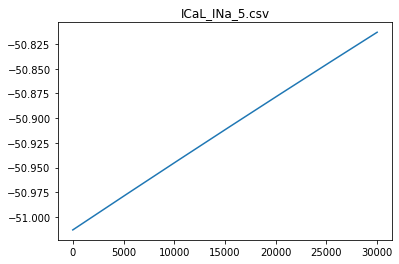

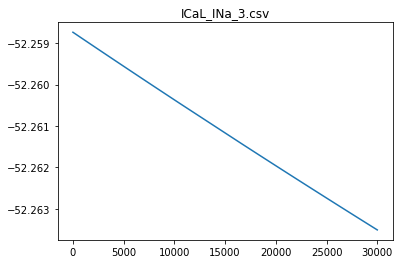

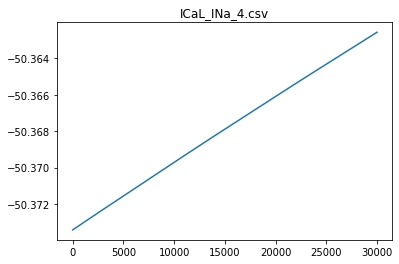

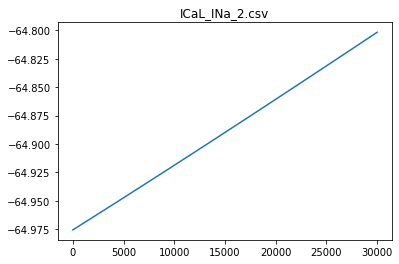

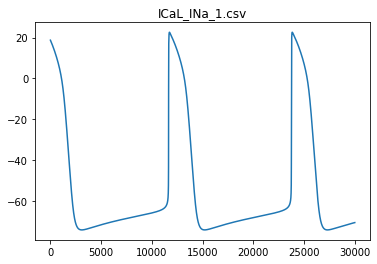

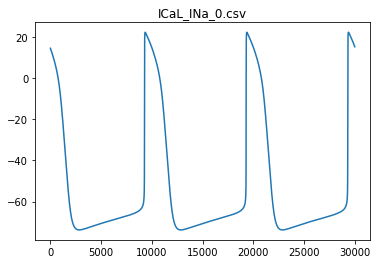

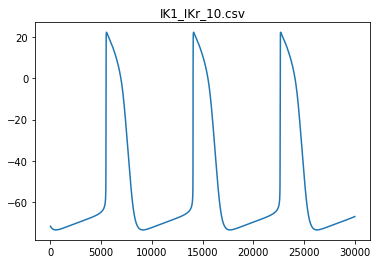

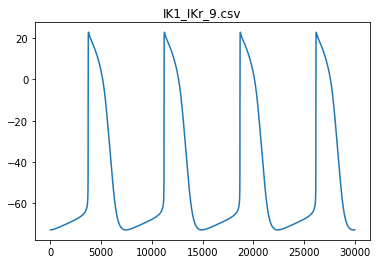

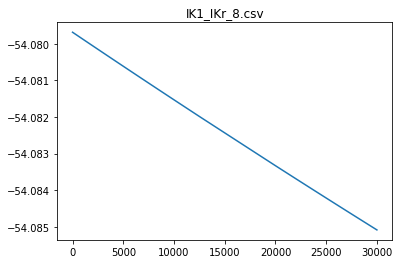

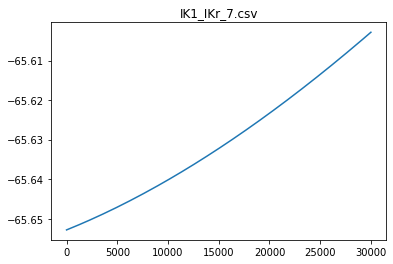

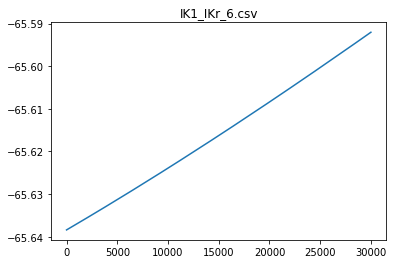

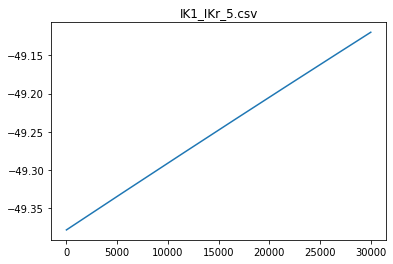

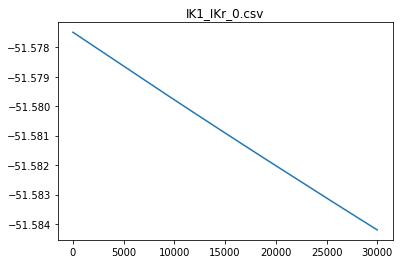

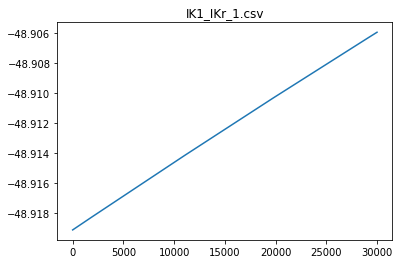

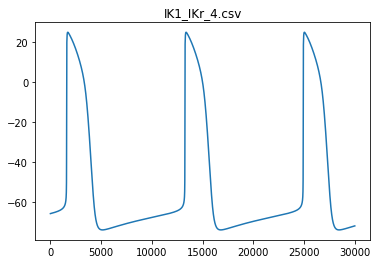

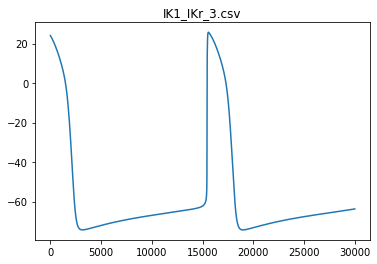

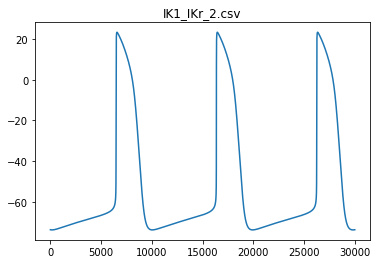

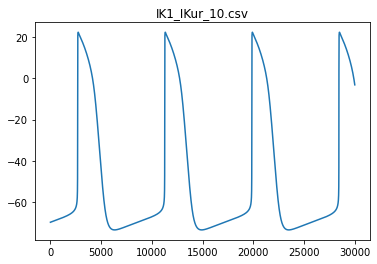

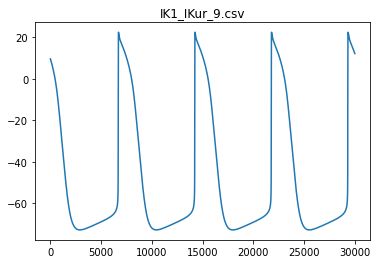

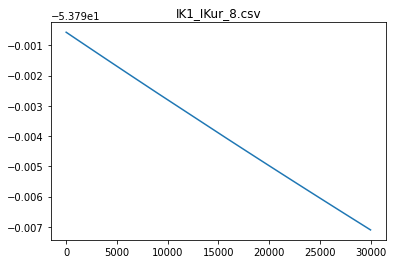

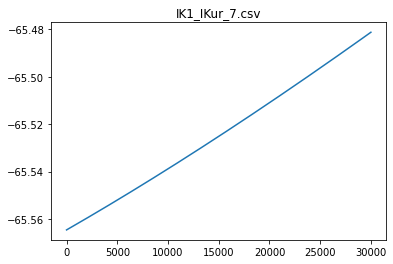

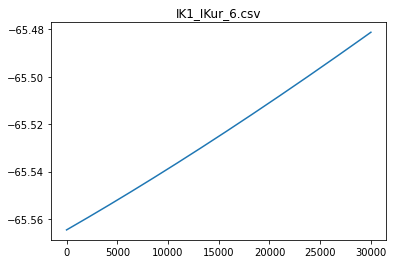

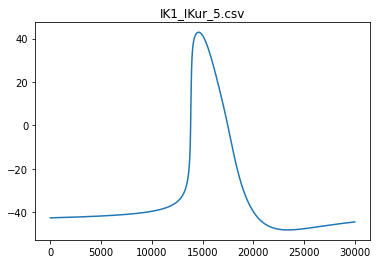

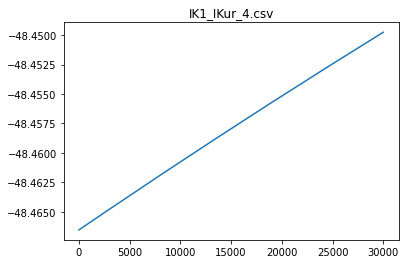

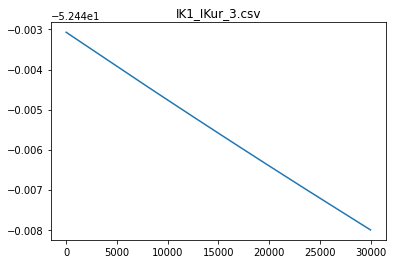

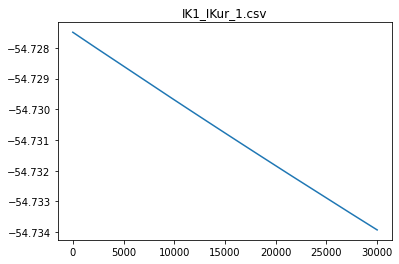

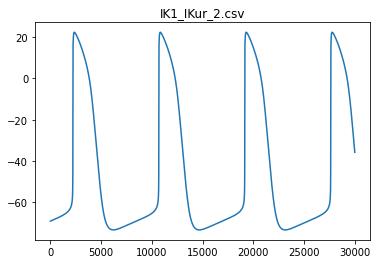

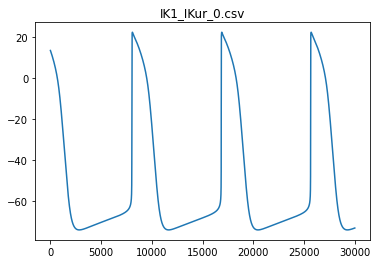

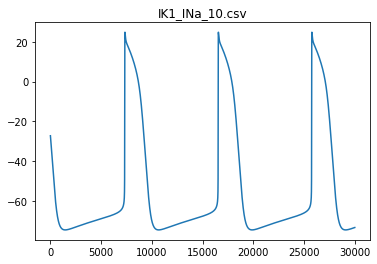

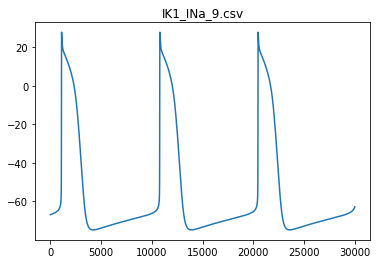

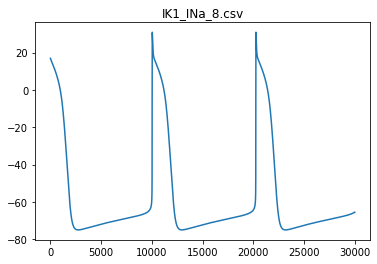

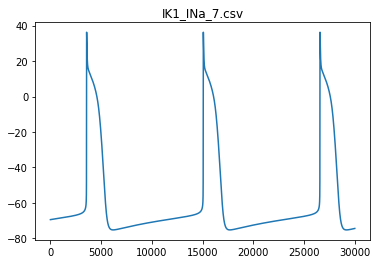

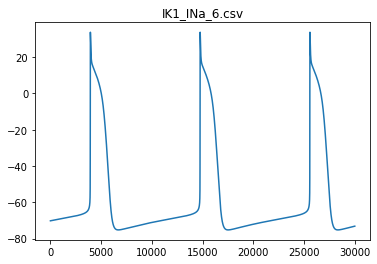

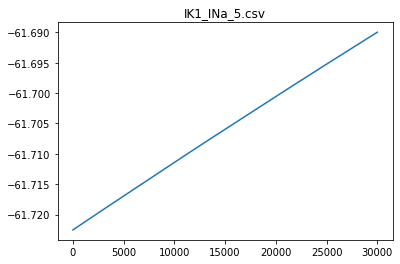

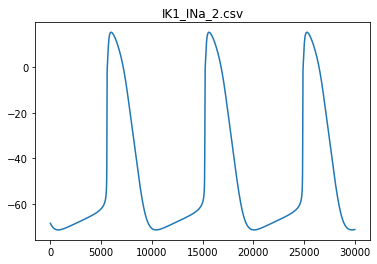

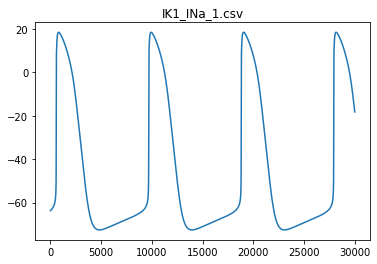

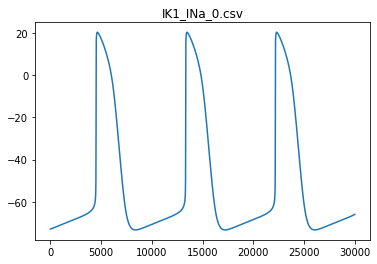

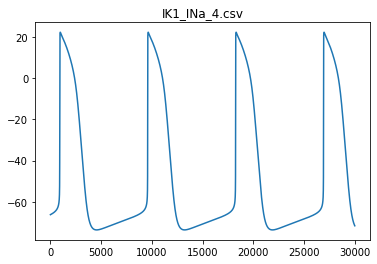

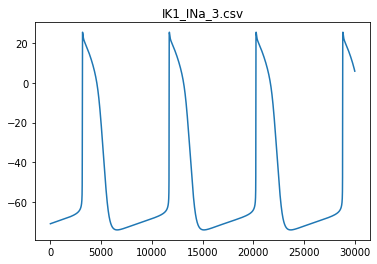

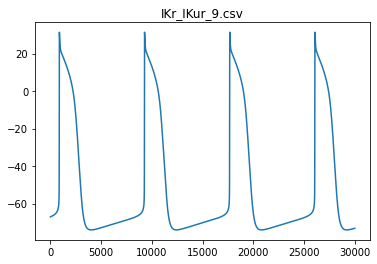

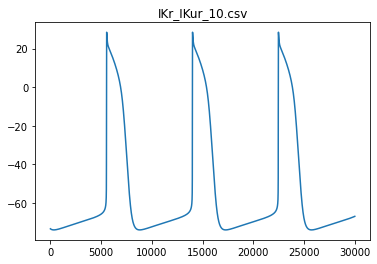

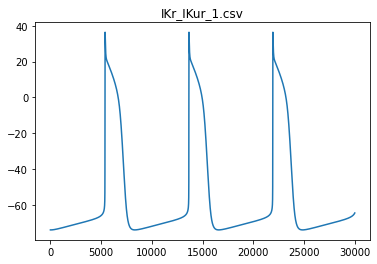

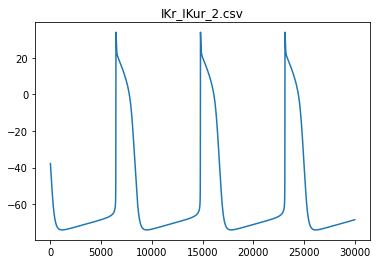

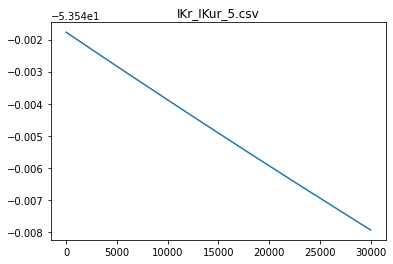

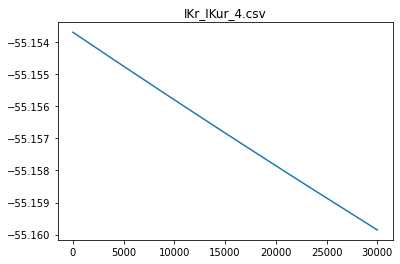

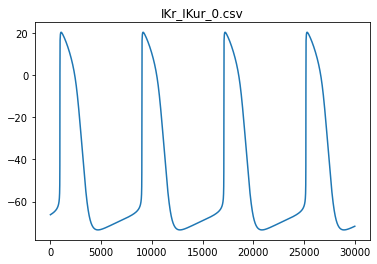

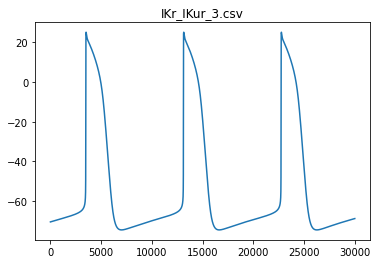

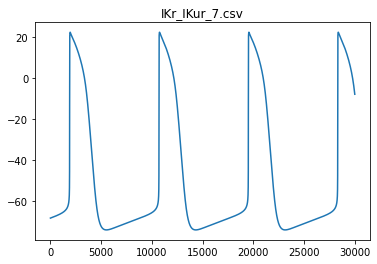

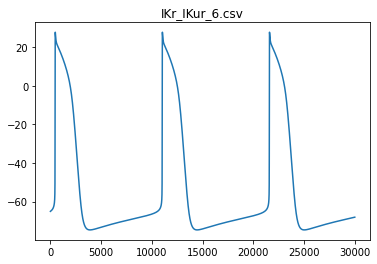

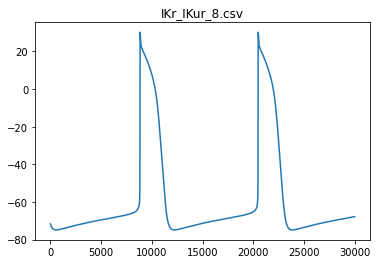

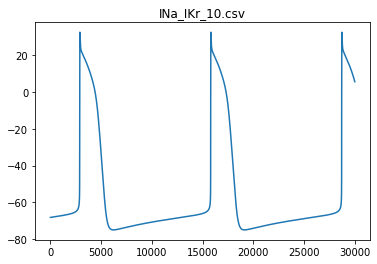

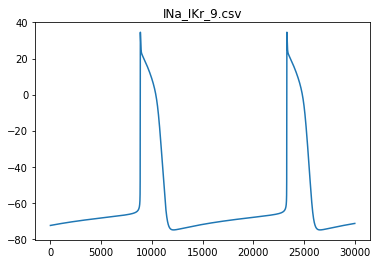

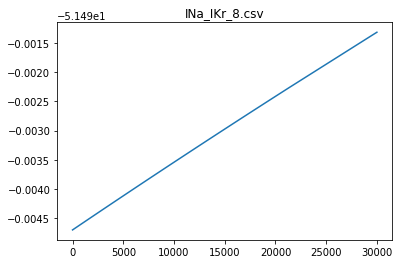

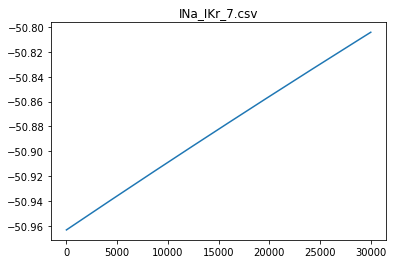

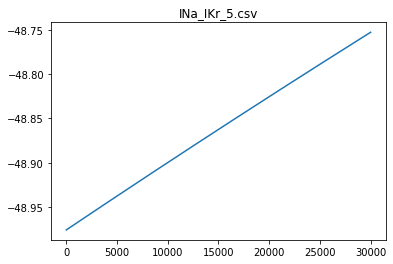

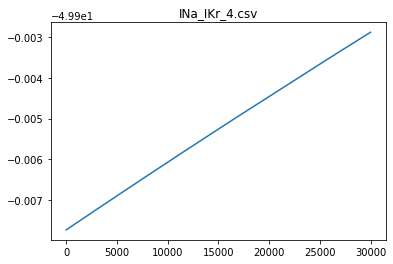

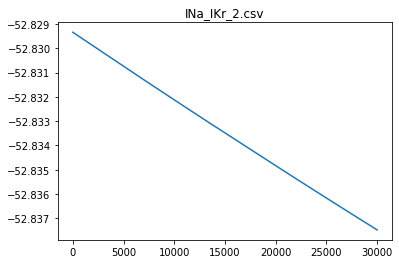

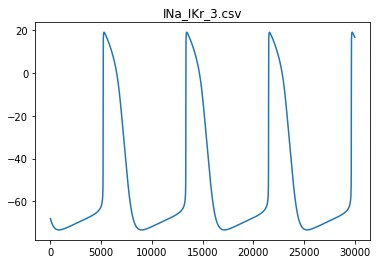

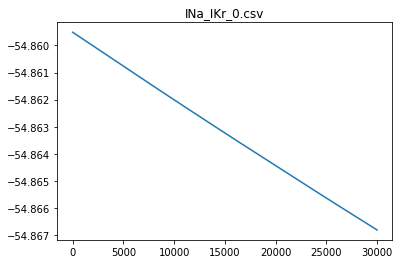

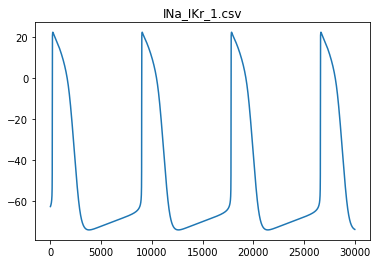

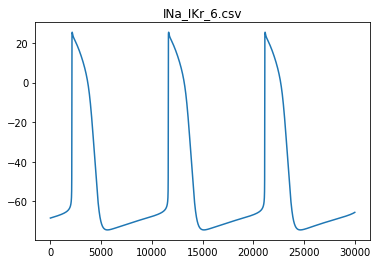

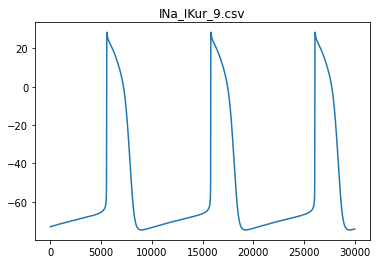

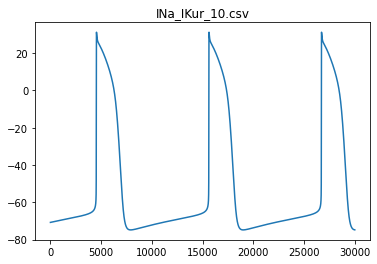

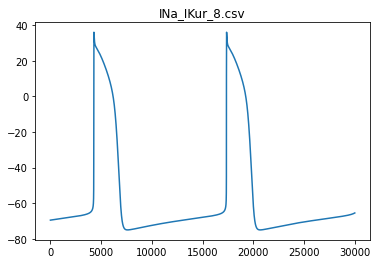

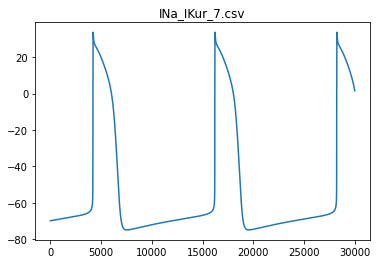

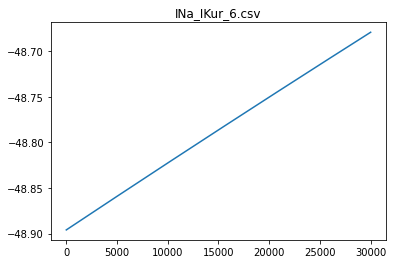

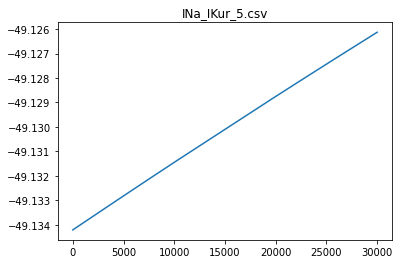

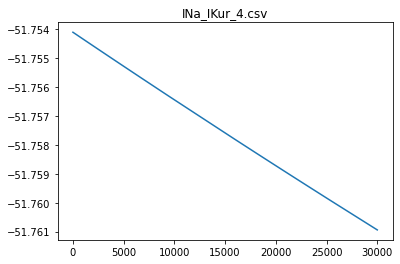

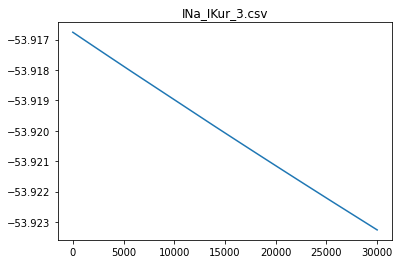

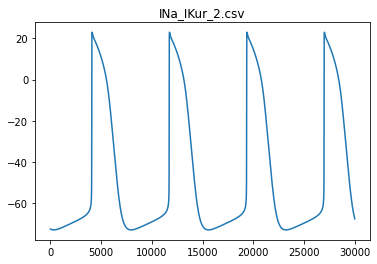

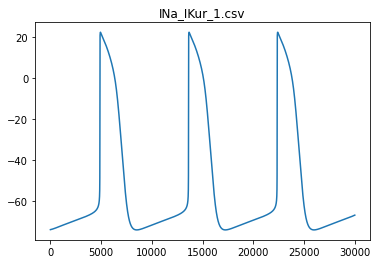

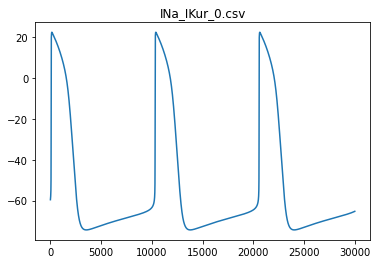

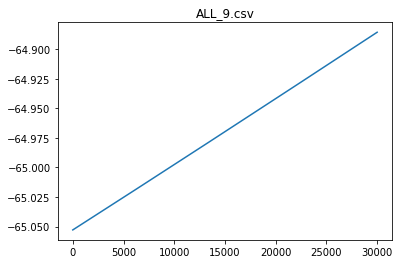

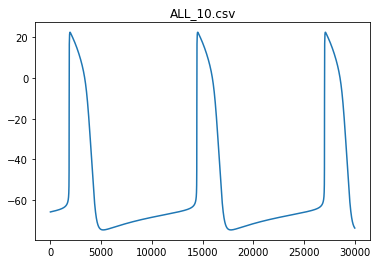

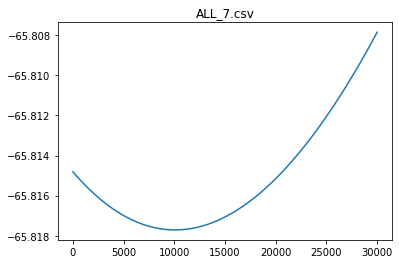

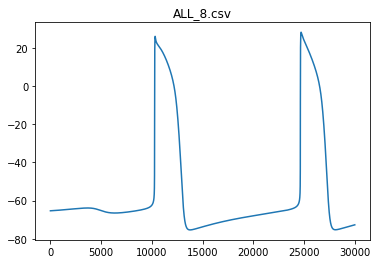

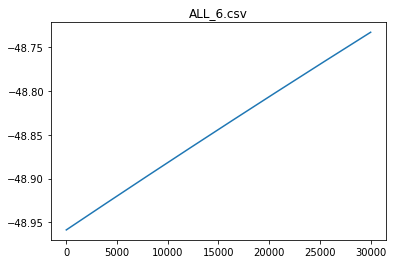

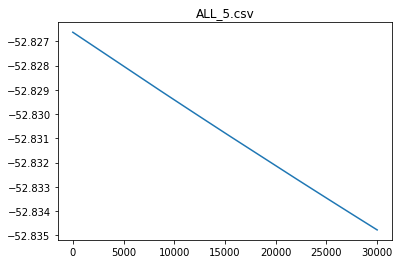

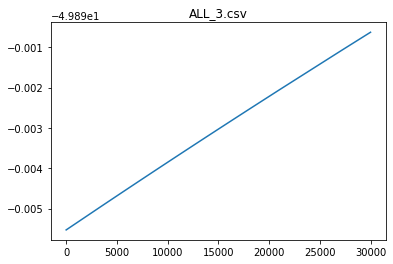

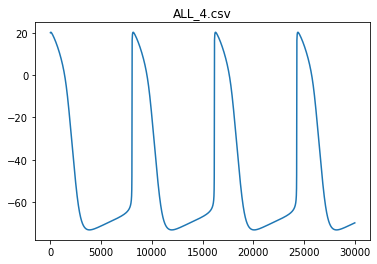

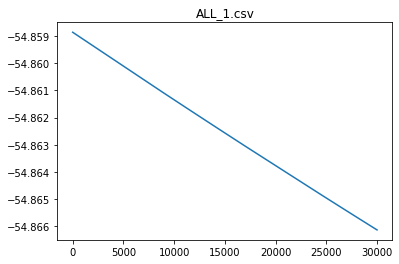

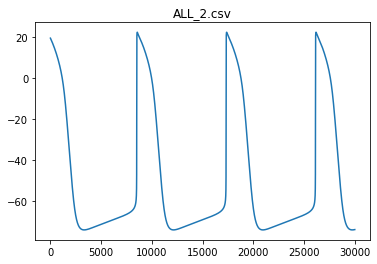

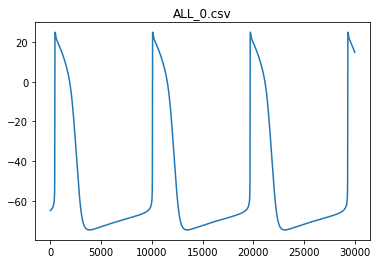

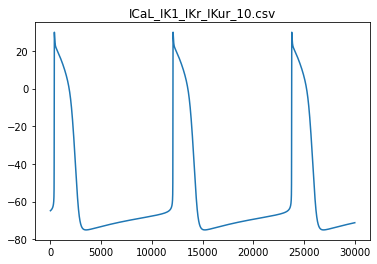

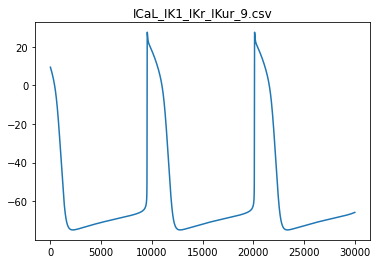

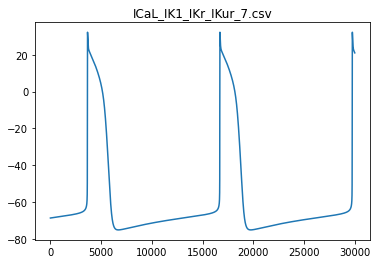

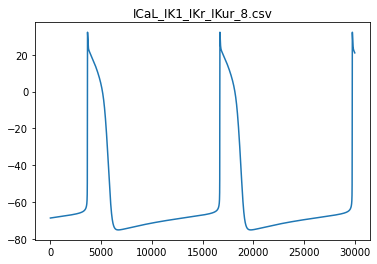

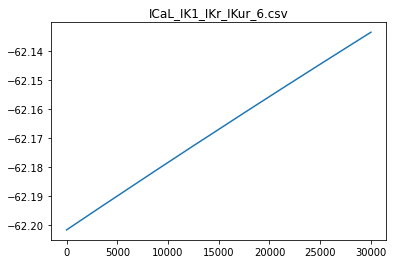

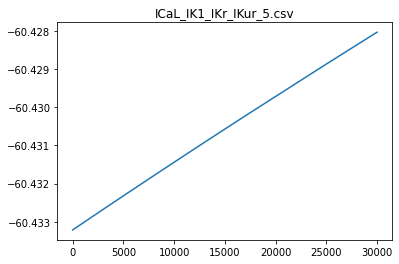

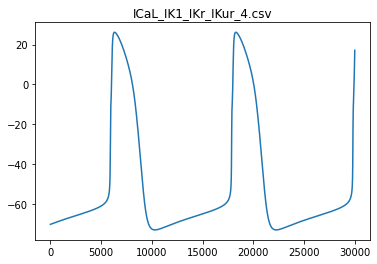

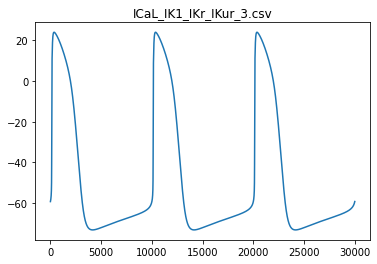

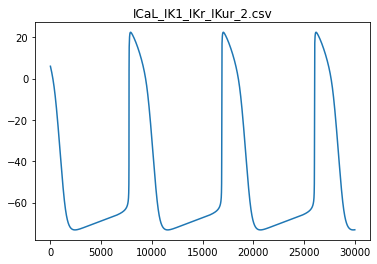

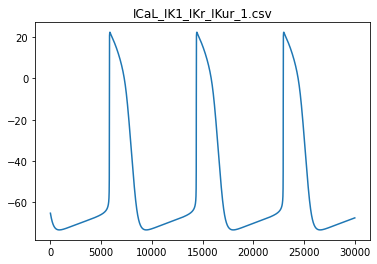

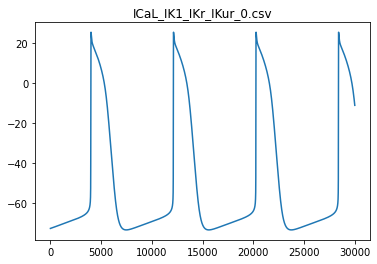

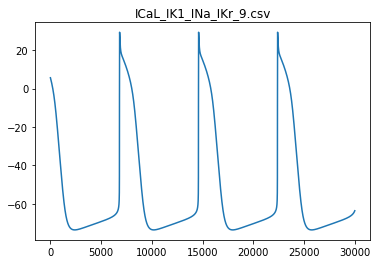

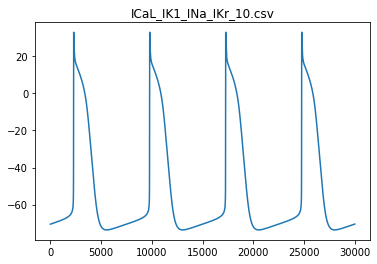

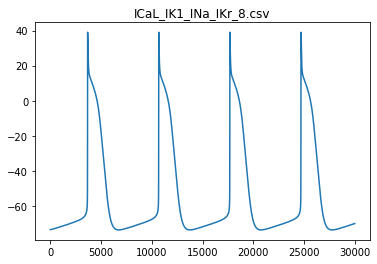

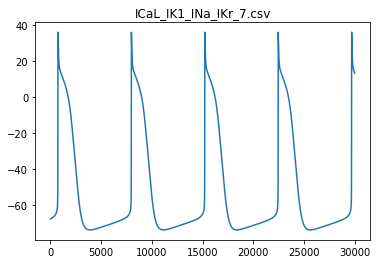

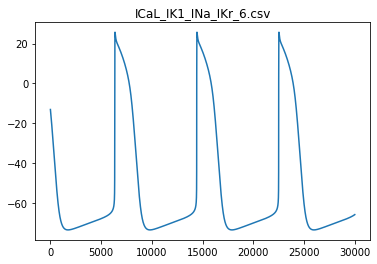

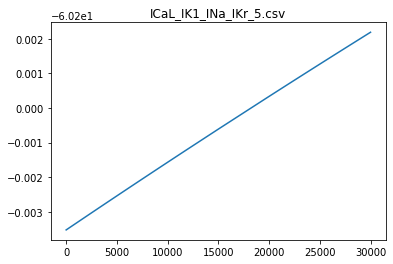

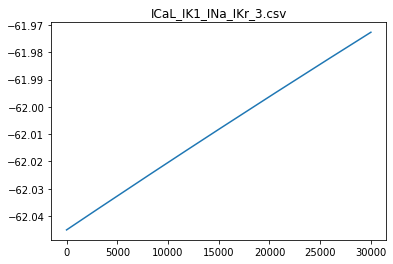

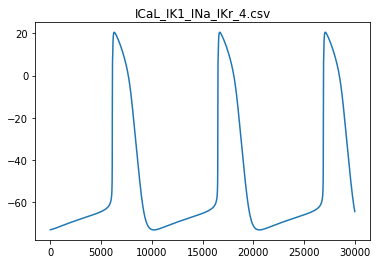

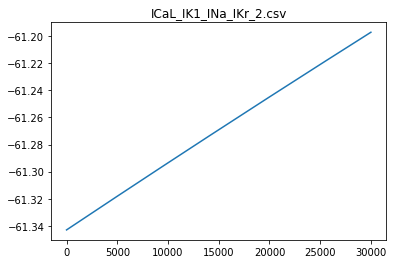

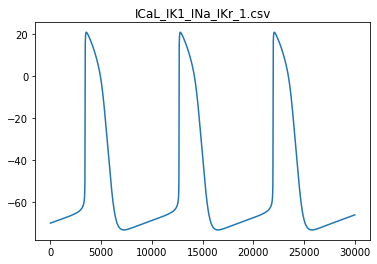

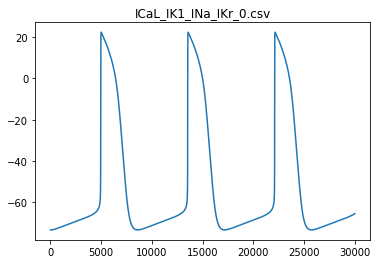

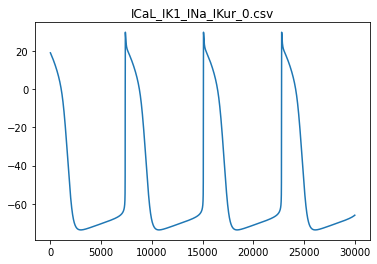

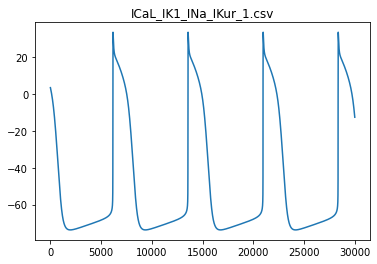

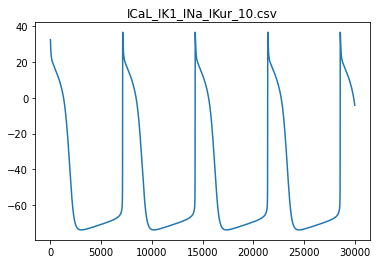

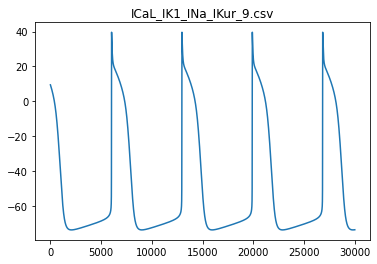

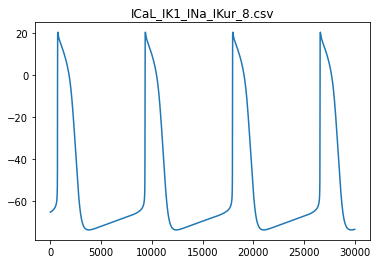

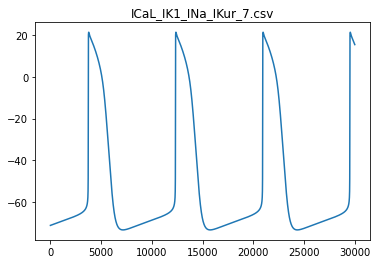

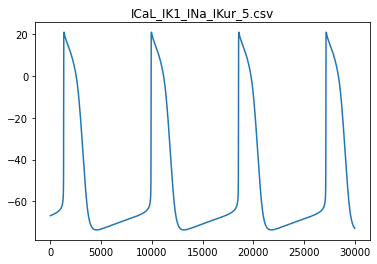

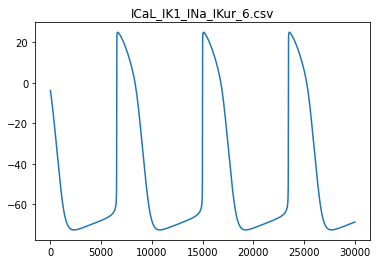

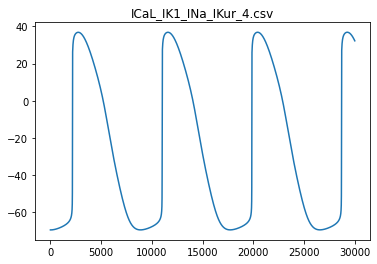

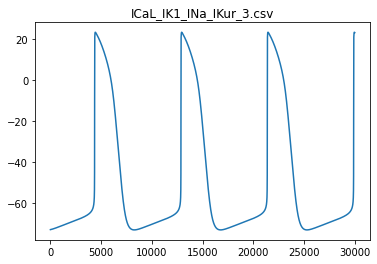

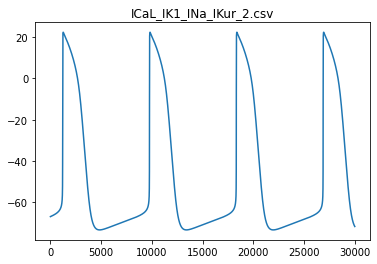

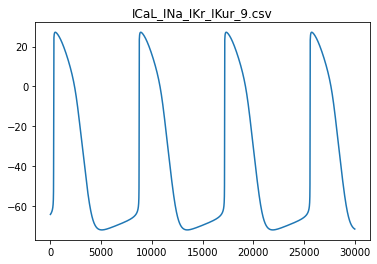

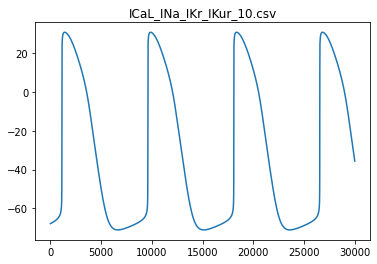

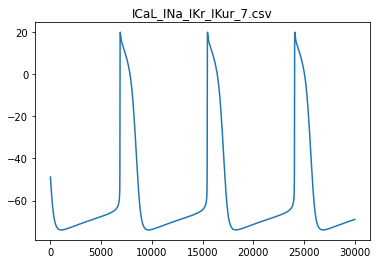

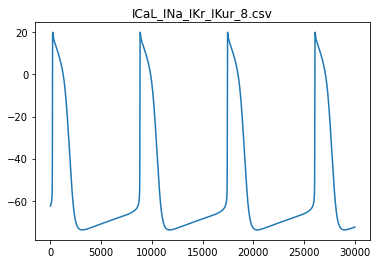

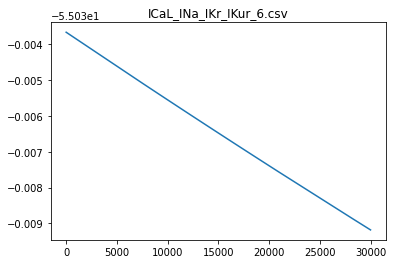

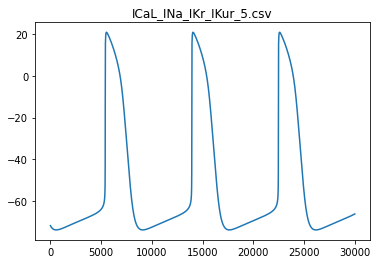

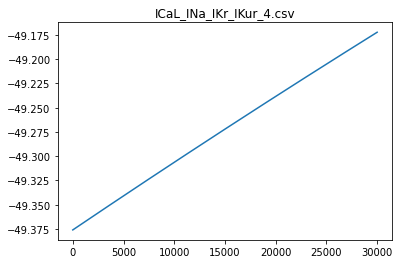

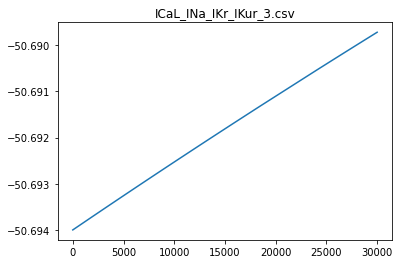

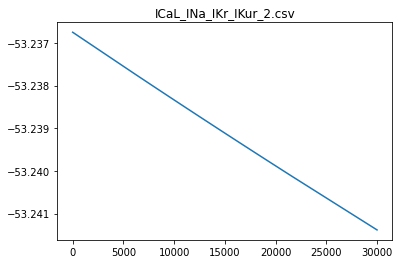

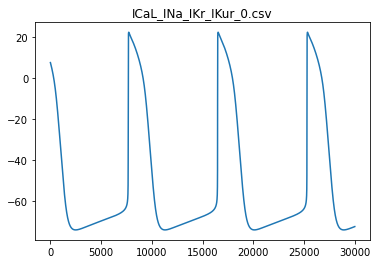

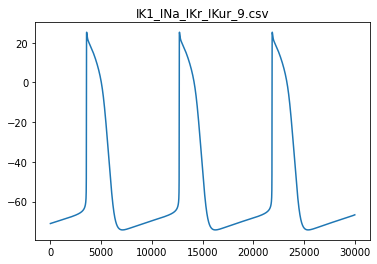

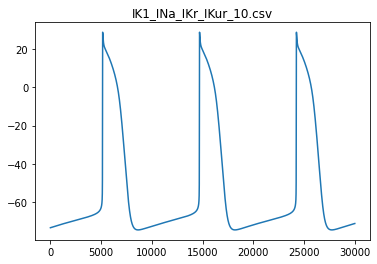

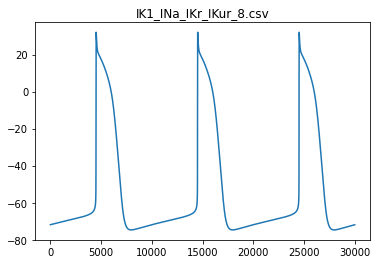

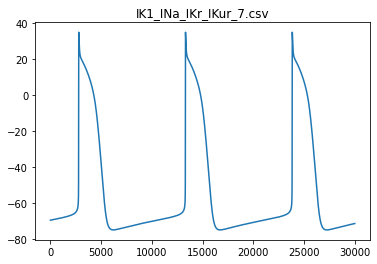

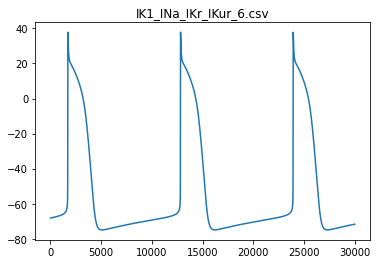

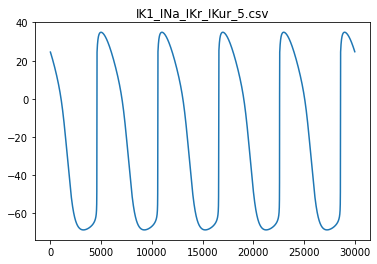

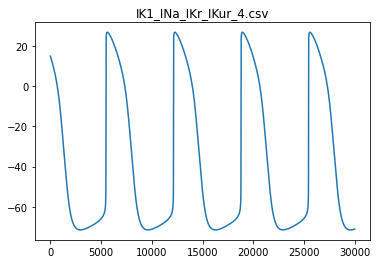

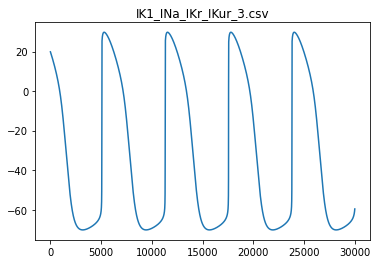

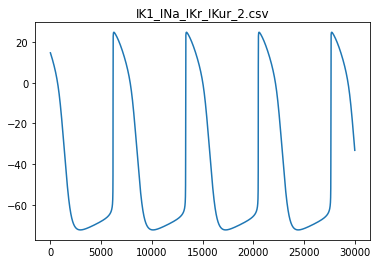

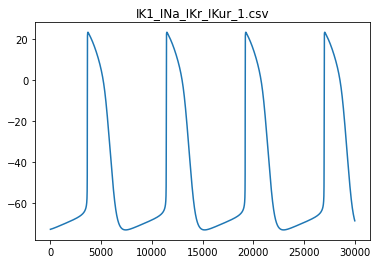

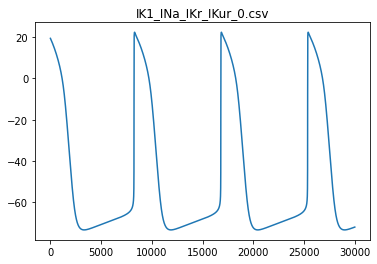

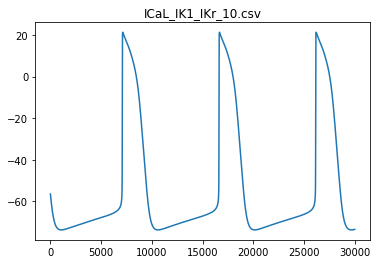

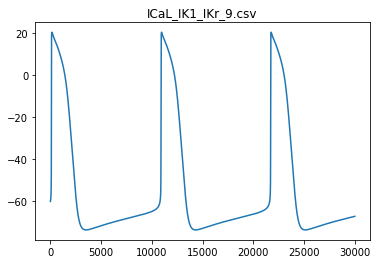

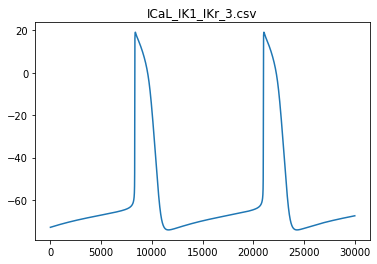

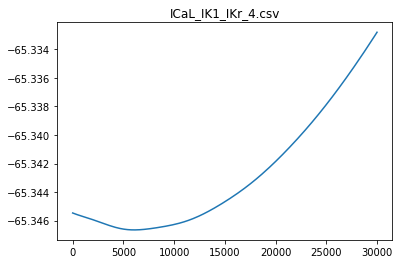

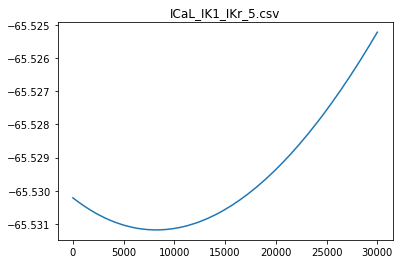

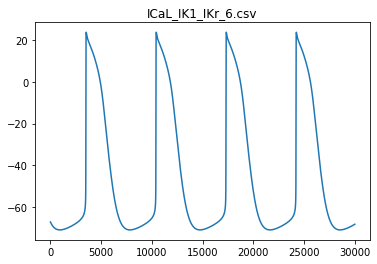

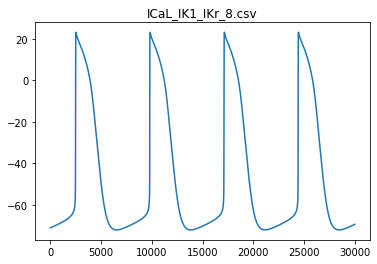

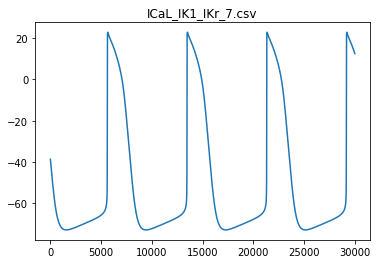

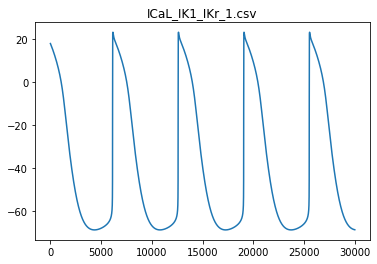

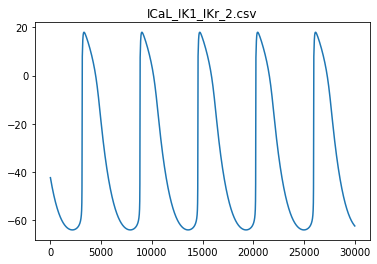

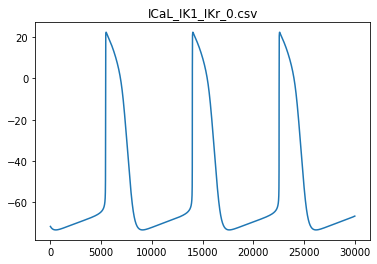

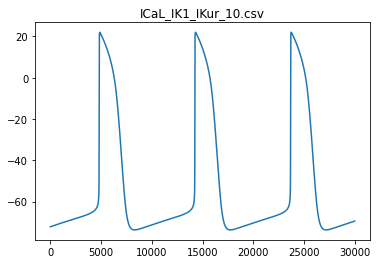

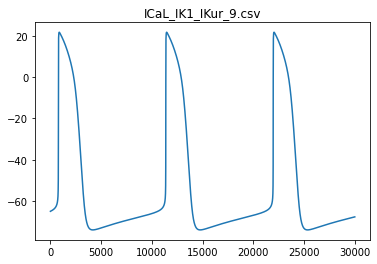

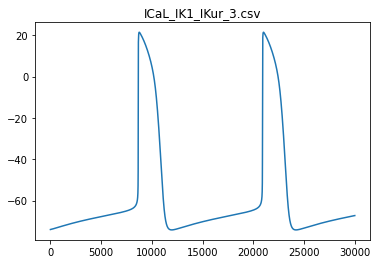

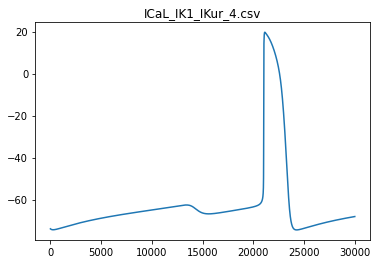

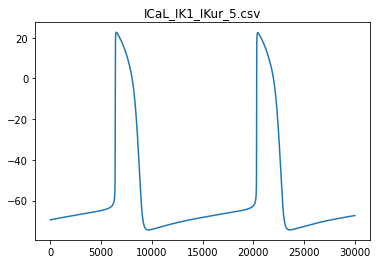

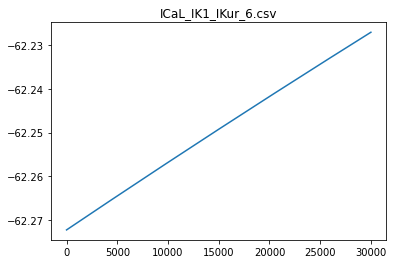

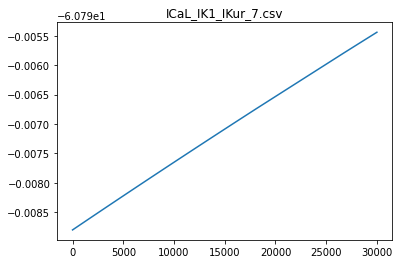

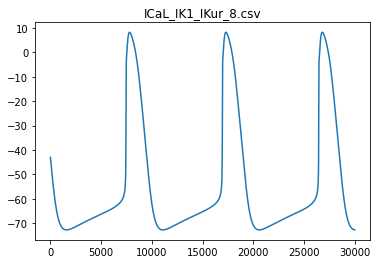

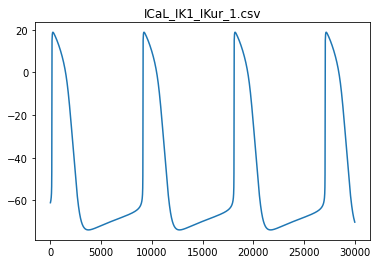

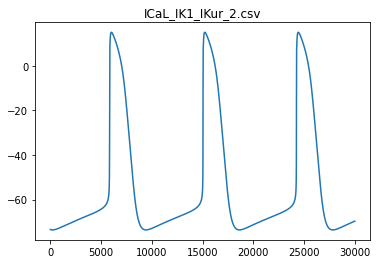

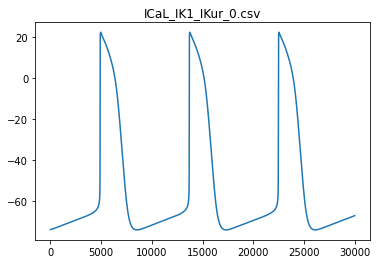

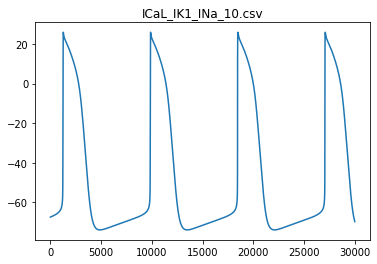

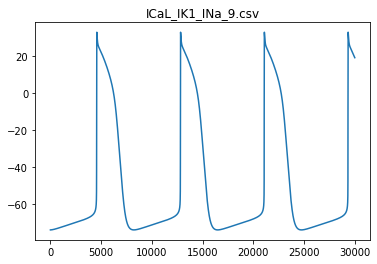

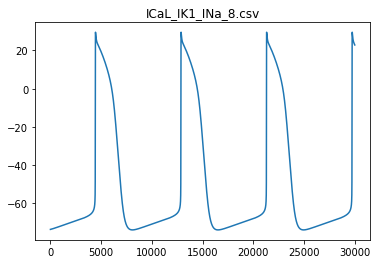

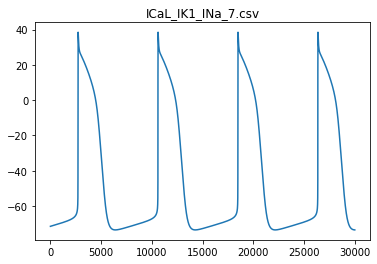

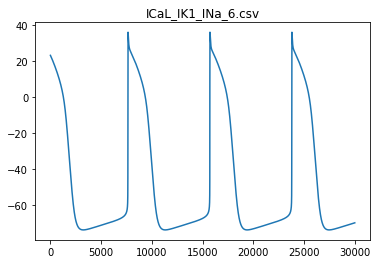

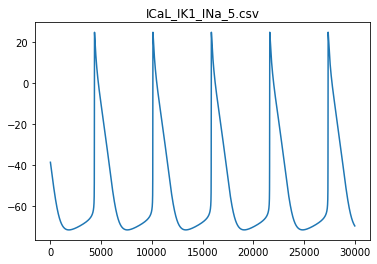

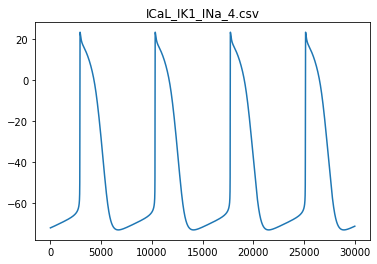

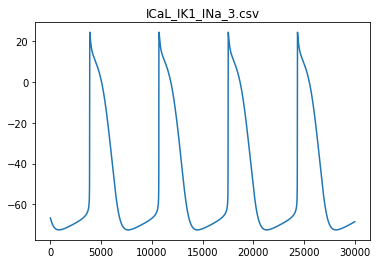

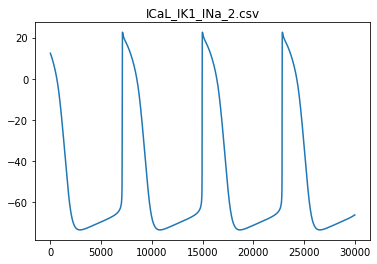

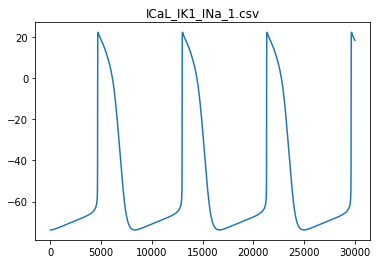

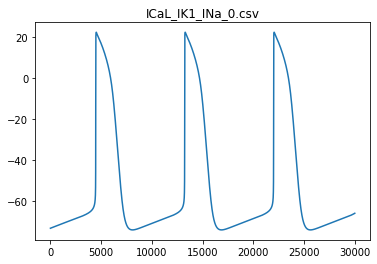

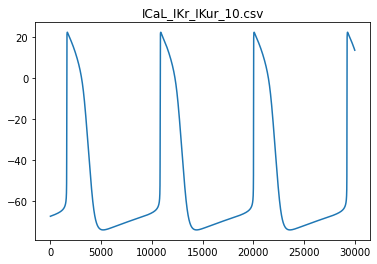

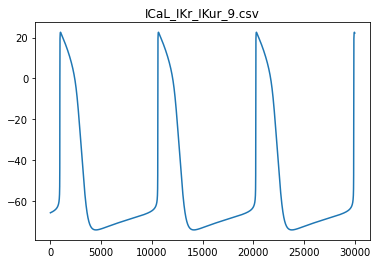

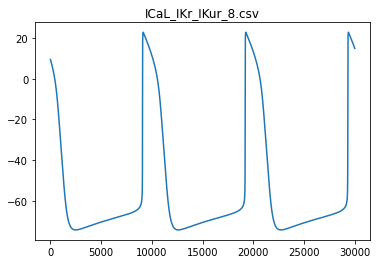

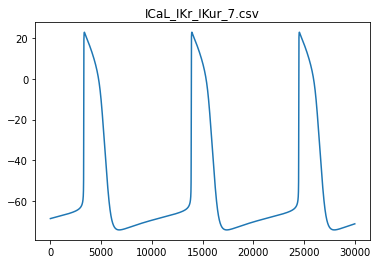

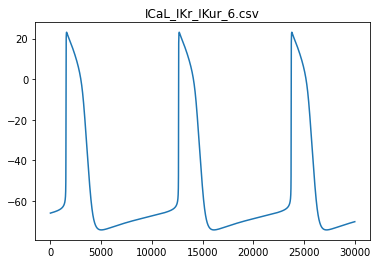

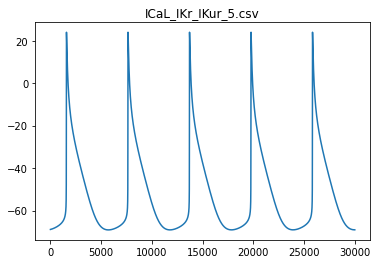

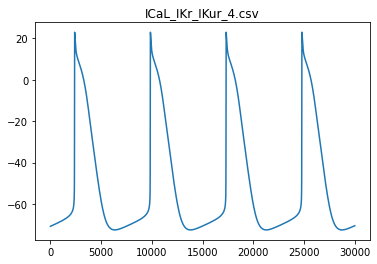

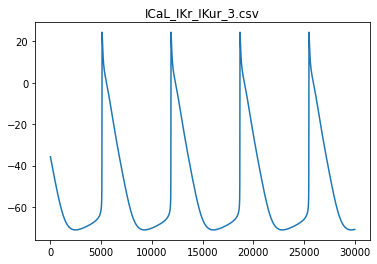

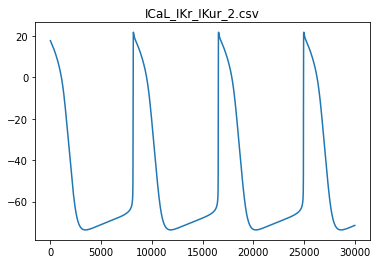

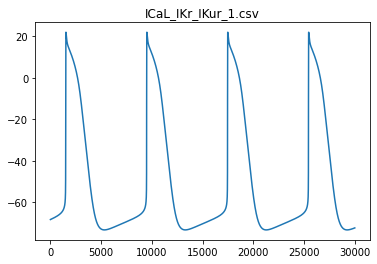

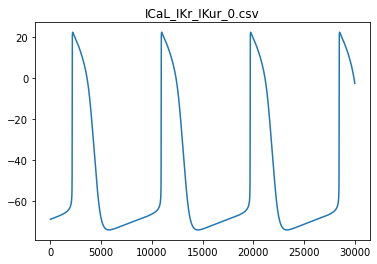

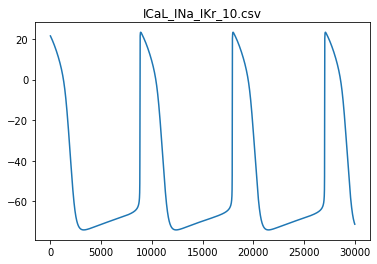

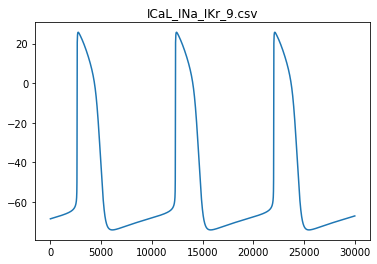

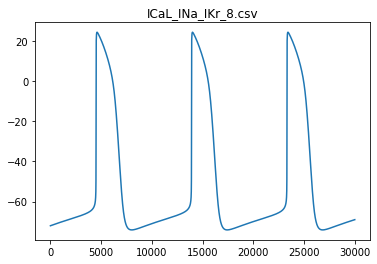

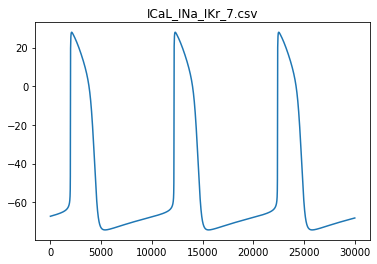

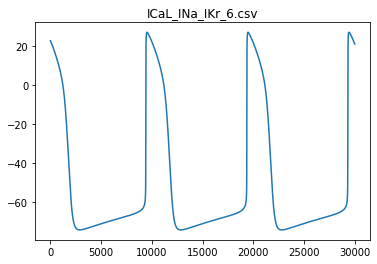

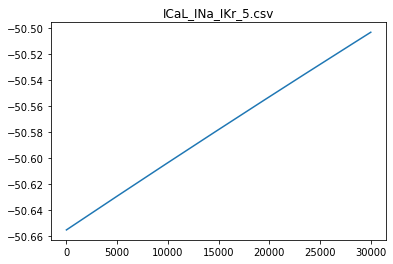

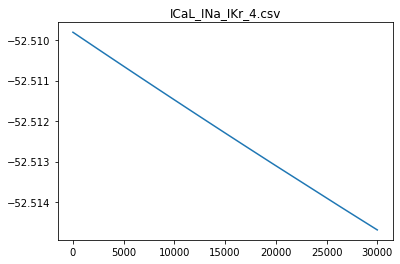

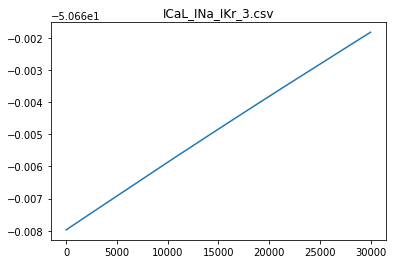

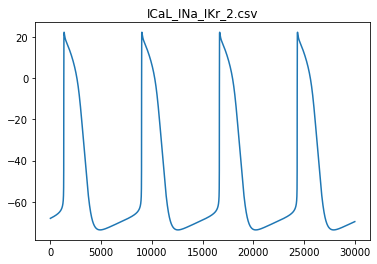

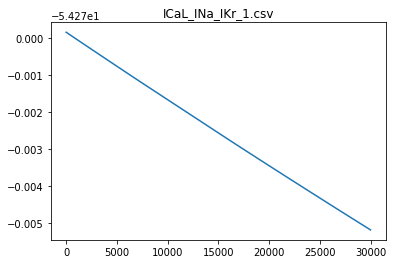

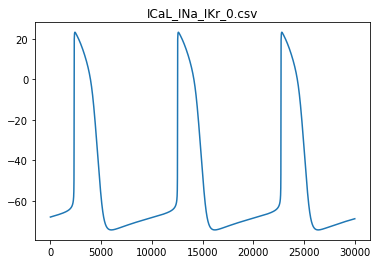

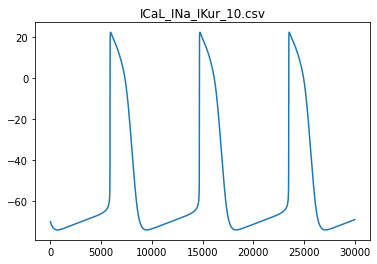

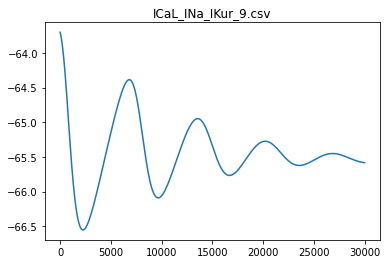

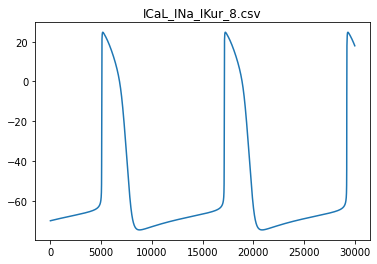

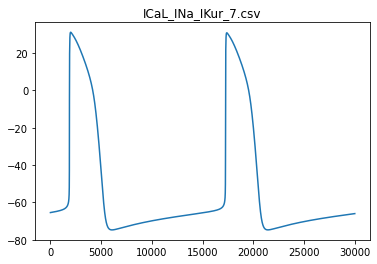

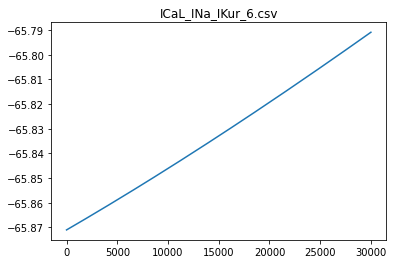

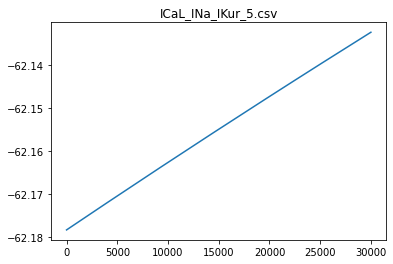

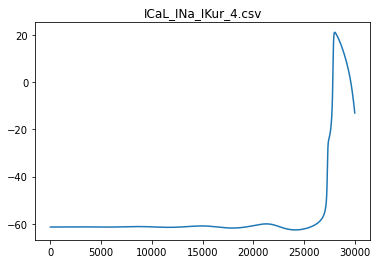

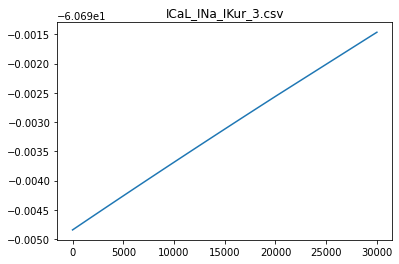

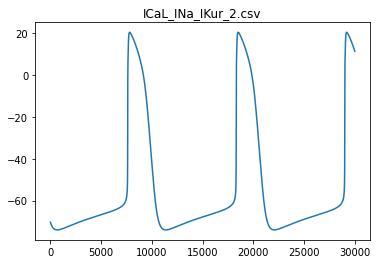

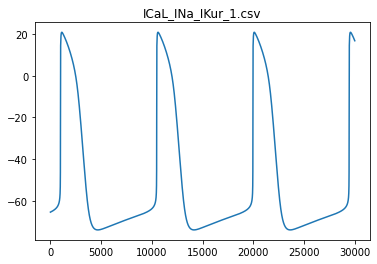

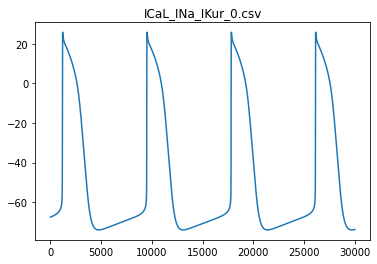

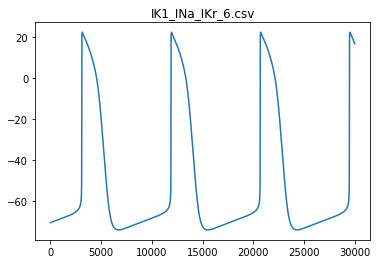

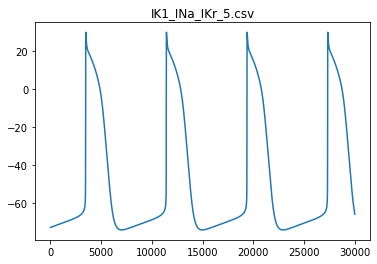

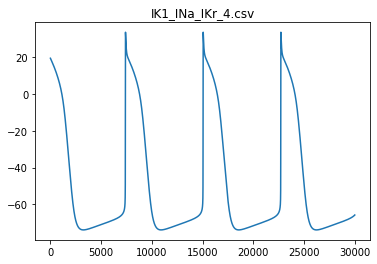

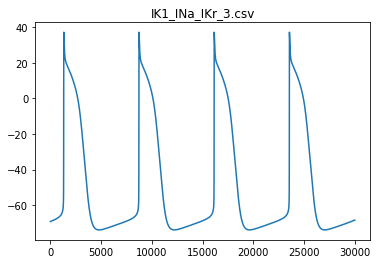

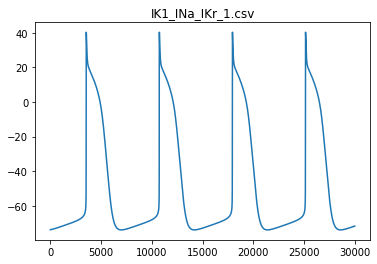

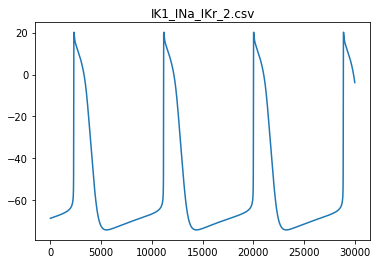

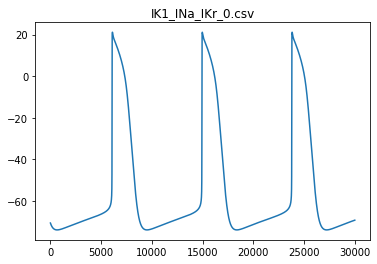

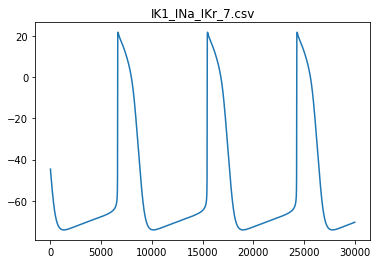

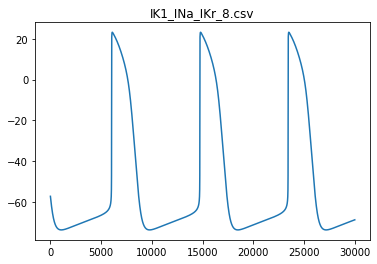

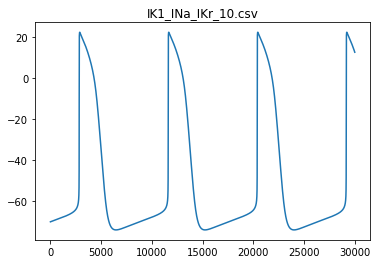

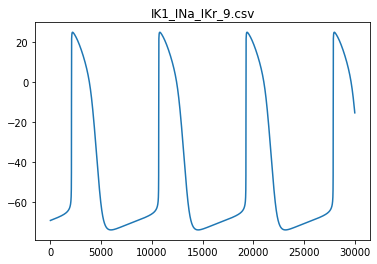

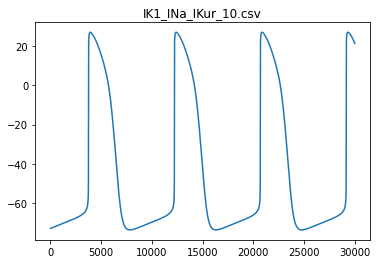

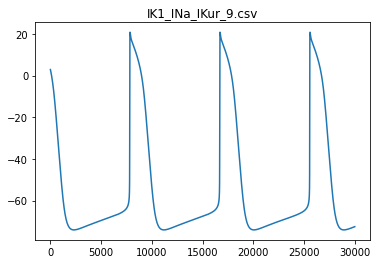

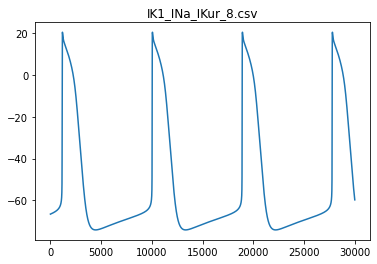

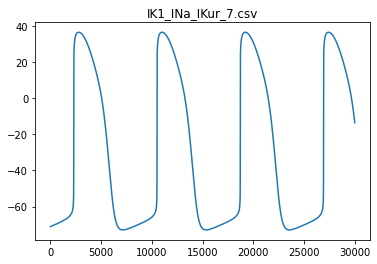

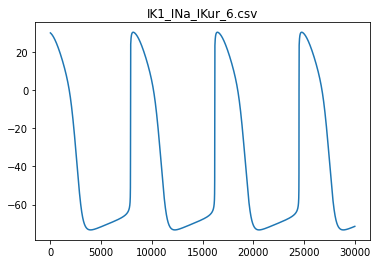

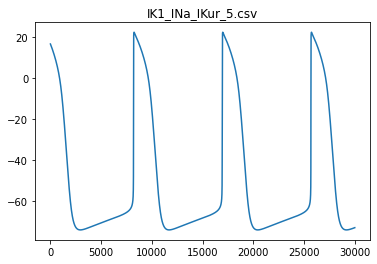

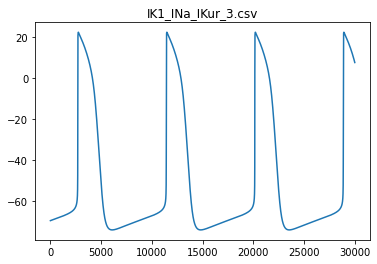

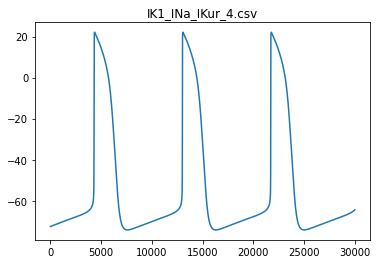

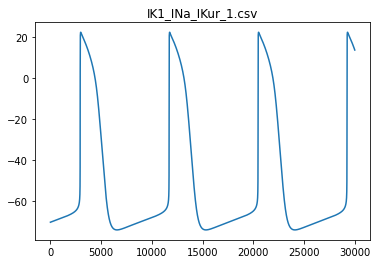

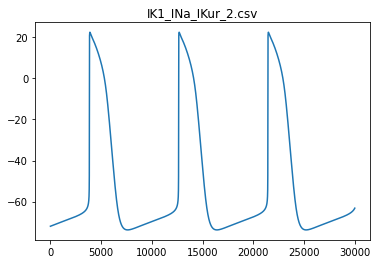

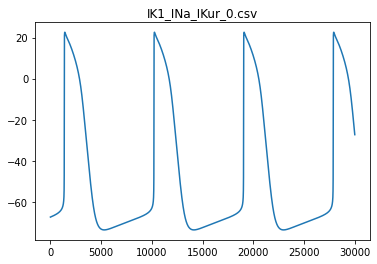

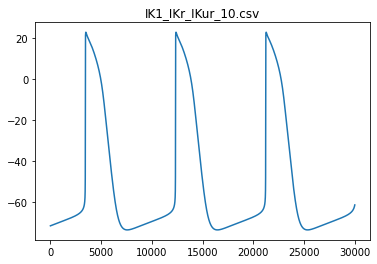

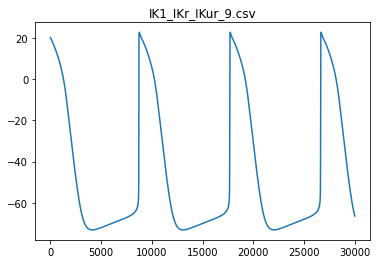

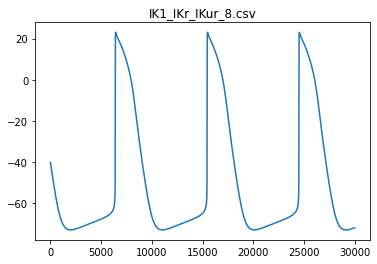

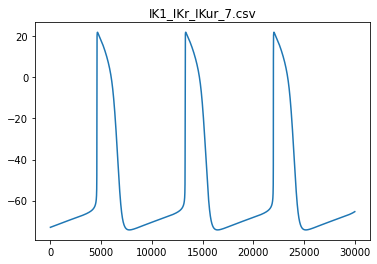

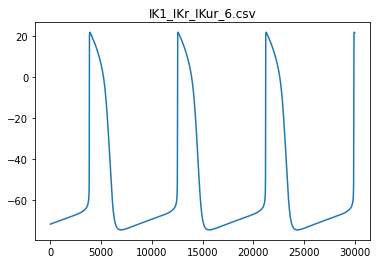

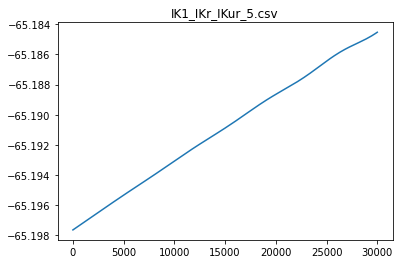

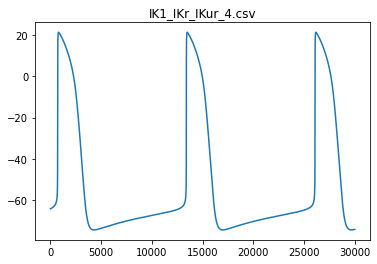

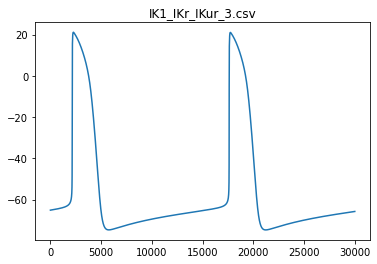

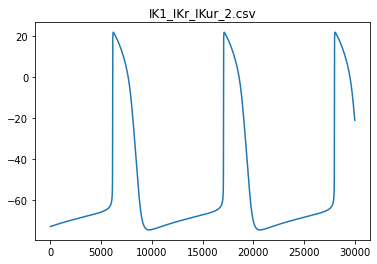

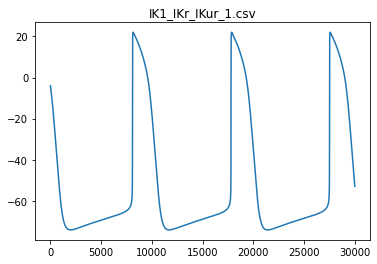

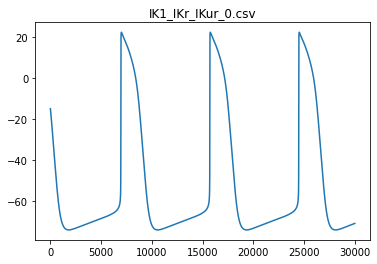

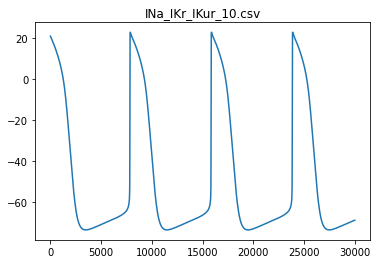

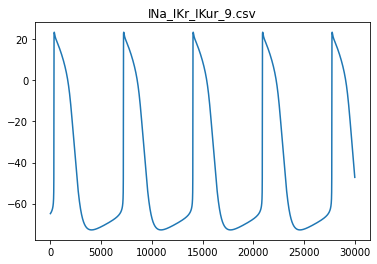

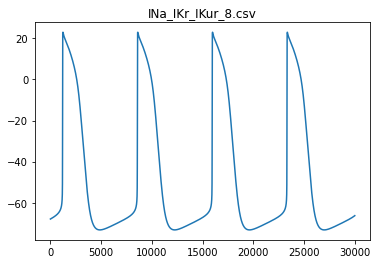

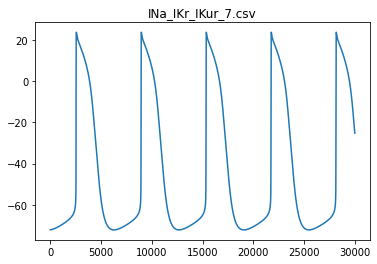

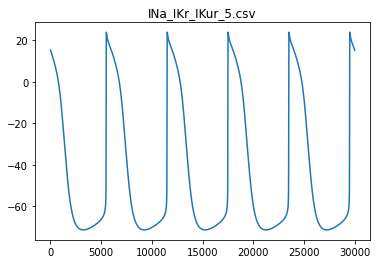

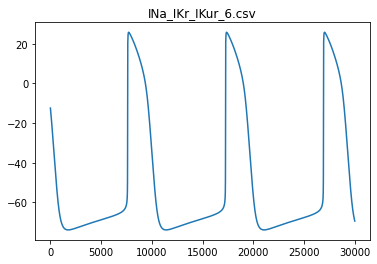

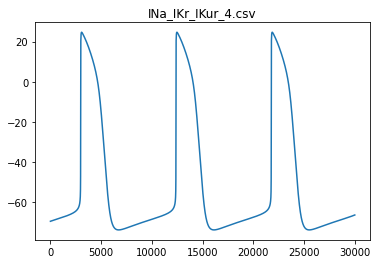

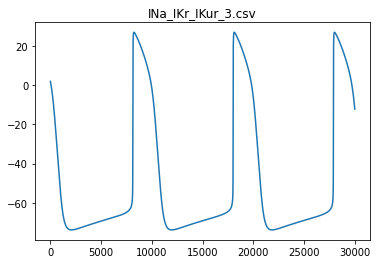

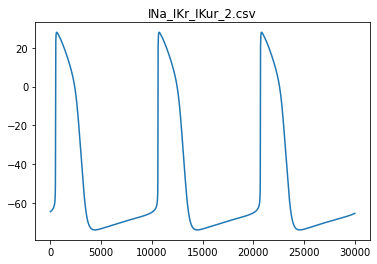

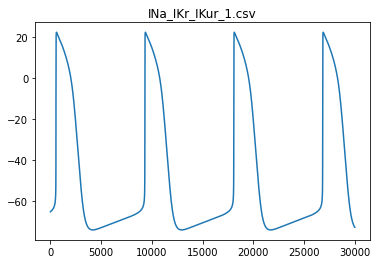

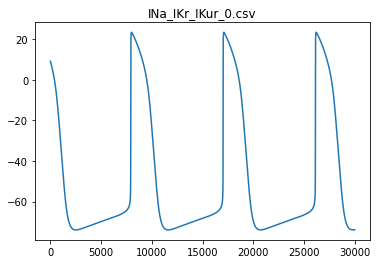

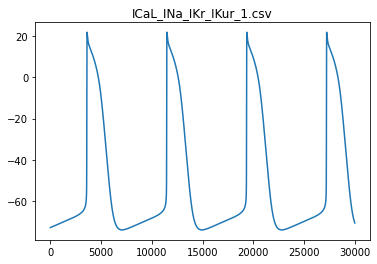

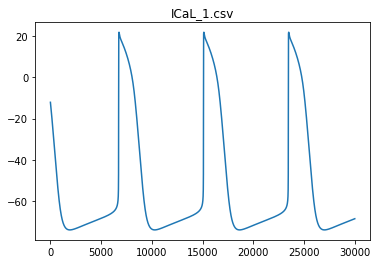

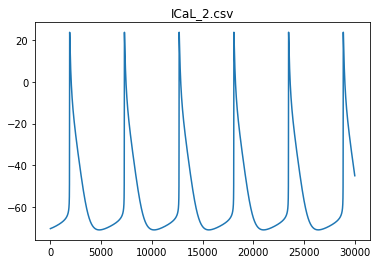

In [160]:
for i in range(341):
    plt.plot(Y_ds[i])
    plt.title(title[i])
    plt.show()
    